Aim: to predict 'price'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset=pd.read_csv('listings.csv')

In [3]:
dataset.shape

(3818, 92)

In [4]:
dataset.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [5]:
dataset.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,

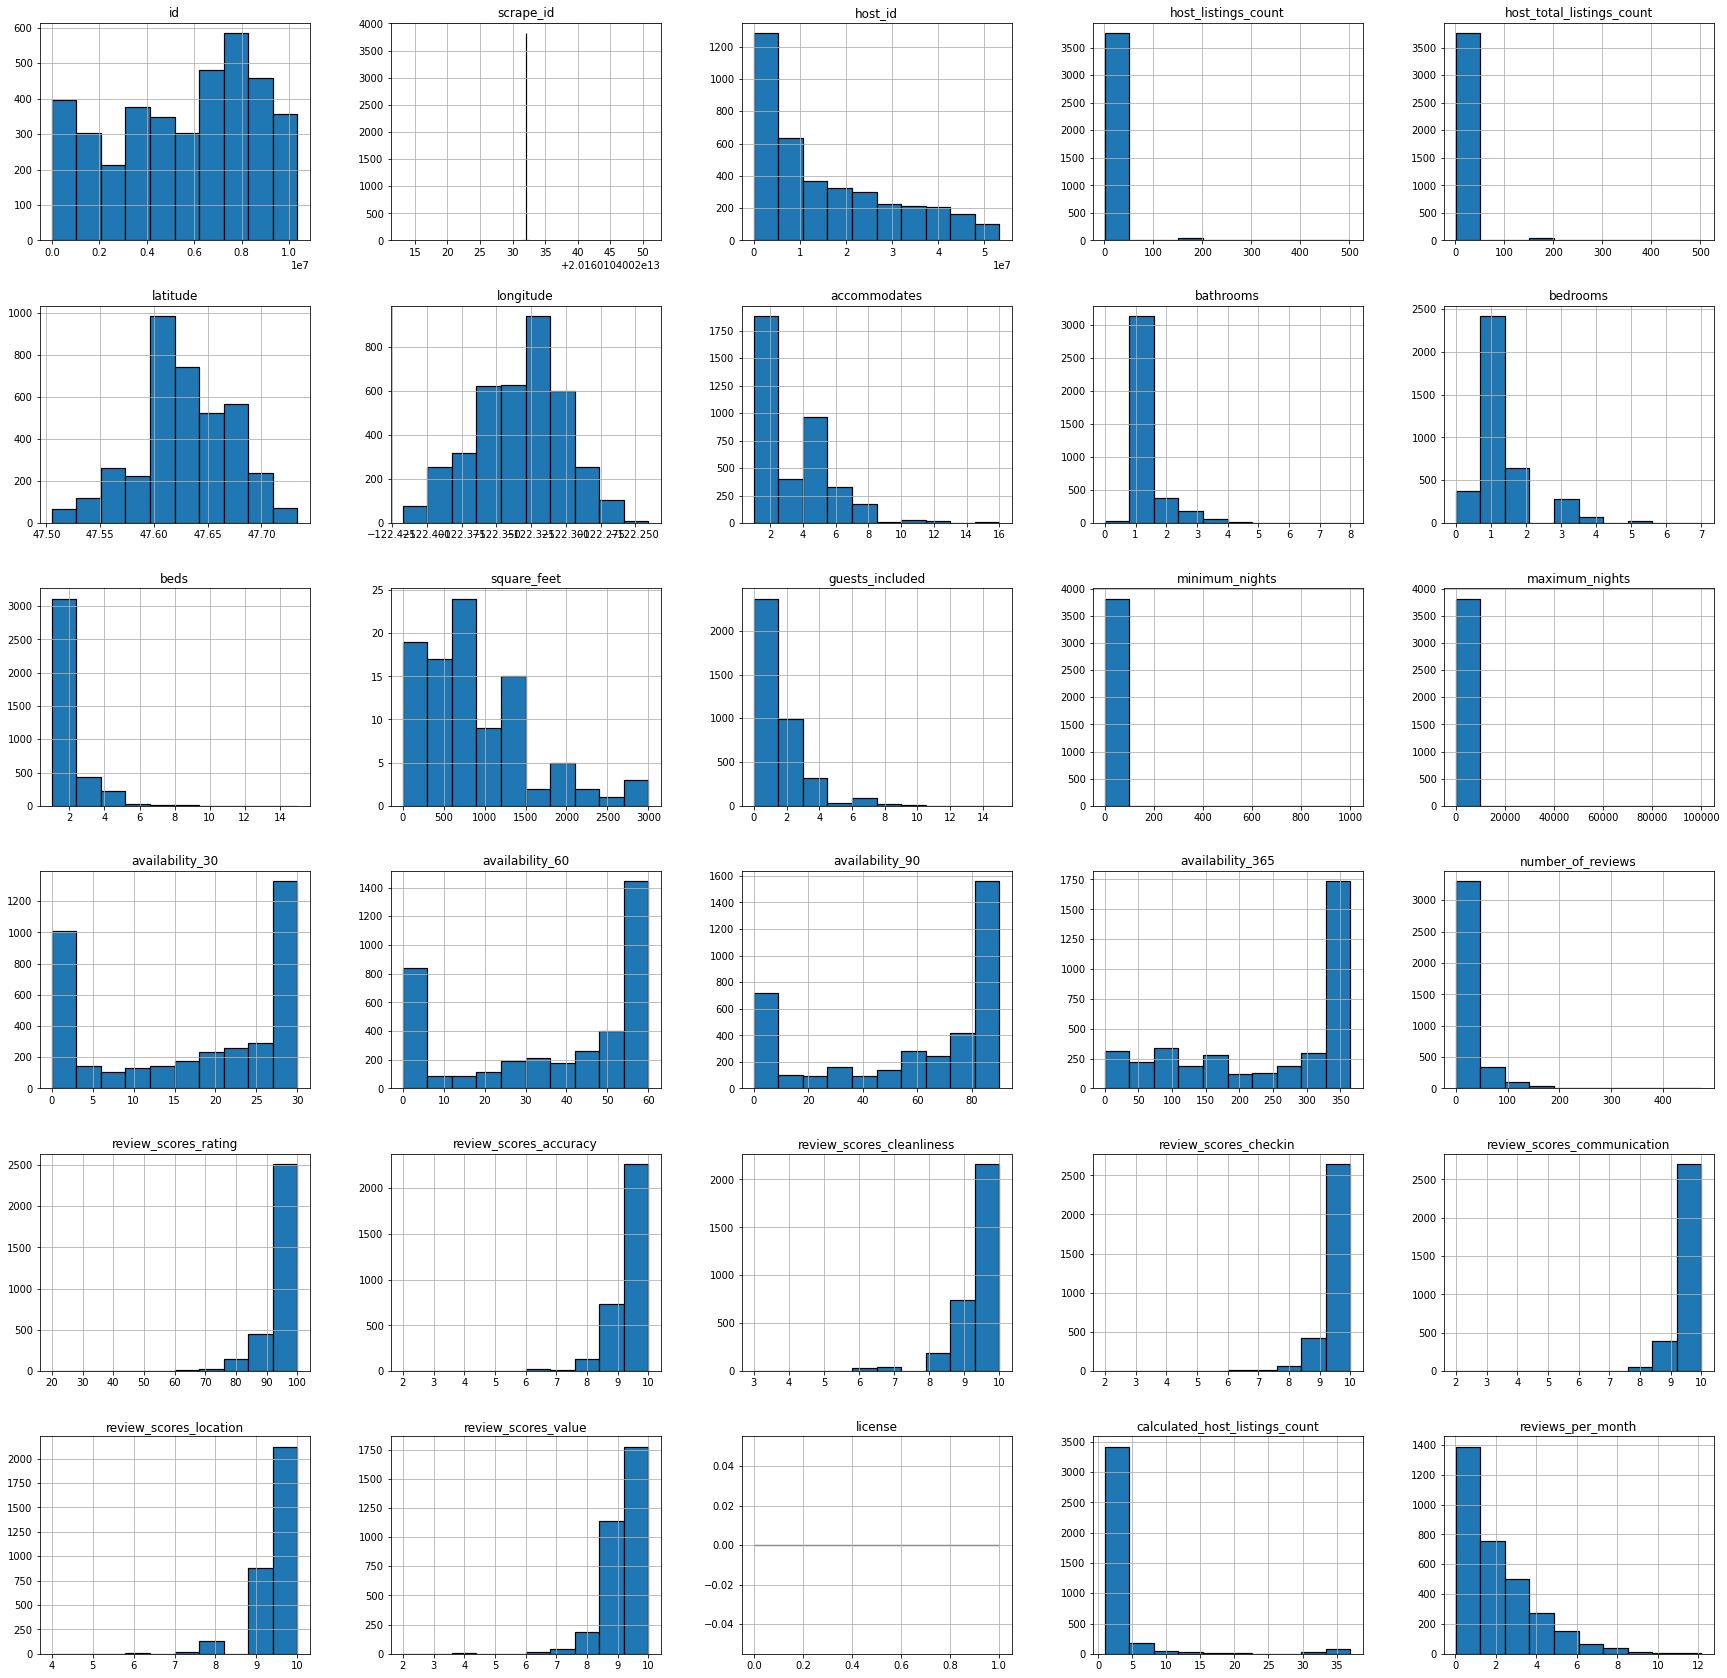

In [6]:
# Visualizing the distribution for every "feature"
dataset.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30));

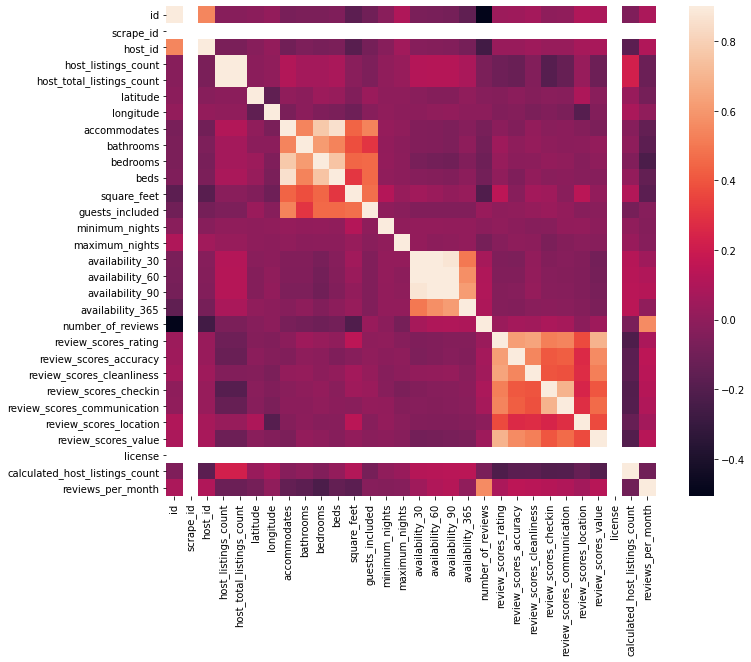

In [7]:
corrmat = dataset.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

Checking for duplicates (duplicate rows)

In [8]:
duplicate = dataset[dataset.duplicated()]
duplicate

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month


In [9]:
dataset.duplicated().sum()

0

Null values

In [10]:
dataset.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

Dropping id column

In [11]:
dataset.drop(['id'], axis = 1,inplace=True)

listing_url column

In [12]:
dataset['listing_url'].isnull().sum()

0

In [13]:
dataset.value_counts('listing_url')

listing_url
https://www.airbnb.com/rooms/9999955     1
https://www.airbnb.com/rooms/4449303     1
https://www.airbnb.com/rooms/447523      1
https://www.airbnb.com/rooms/447488      1
https://www.airbnb.com/rooms/4468524     1
                                        ..
https://www.airbnb.com/rooms/7501583     1
https://www.airbnb.com/rooms/7500976     1
https://www.airbnb.com/rooms/7500728     1
https://www.airbnb.com/rooms/7500191     1
https://www.airbnb.com/rooms/10000273    1
Length: 3818, dtype: int64

In [14]:
#dropping this column
dataset.drop(['listing_url'], axis = 1,inplace=True)

In [15]:
dataset.shape

(3818, 90)

scrape_id column

In [16]:
dataset.value_counts('scrape_id')

scrape_id
20160104002432    3818
dtype: int64

In [17]:
#dropping this column
dataset.drop(['scrape_id'], axis = 1,inplace=True)

last_scraped column

In [18]:
dataset.value_counts('last_scraped')

last_scraped
2016-01-04    3818
dtype: int64

In [19]:
#dropping this column
dataset.drop(['last_scraped'], axis = 1,inplace=True)

name column

In [20]:
#dropping this column
dataset.drop(['name'], axis = 1,inplace=True)

In [21]:
dataset.head()

,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,https://a2.muscache.com/ac/pictures/b4324e0f-a...,NaN,16708587,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,wit

experiences_offered column

In [22]:
dataset['experiences_offered'].isnull().sum()

0

In [23]:
dataset.value_counts('experiences_offered')

experiences_offered
none    3818
dtype: int64

In [24]:
#dropping this column
dataset.drop(['experiences_offered'], axis = 1,inplace=True)

thumbnail_url

In [25]:
dataset['thumbnail_url'].isnull().sum()

320

In [26]:
dataset.value_counts('thumbnail_url')

thumbnail_url
https://a2.muscache.com/ac/pictures/ff31a2ff-b918-4e6a-992b-98afaacd78a2.jpg?interpolation=lanczos-none&size=small&output-format=jpg&output-quality=70    1
https://a1.muscache.com/ac/pictures/23547023/0f614ece_original.jpg?interpolation=lanczos-none&size=small&output-format=jpg&output-quality=70              1
https://a1.muscache.com/ac/pictures/25123883/1d7c2b2e_original.jpg?interpolation=lanczos-none&size=small&output-format=jpg&output-quality=70              1
https://a1.muscache.com/ac/pictures/25039200/fab4b8f8_original.jpg?interpolation=lanczos-none&size=small&output-format=jpg&output-quality=70              1
https://a1.muscache.com/ac/pictures/2492843/ddda795c_original.jpg?interpolation=lanczos-none&size=small&output-format=jpg&output-quality=70               1
                                                                                                                                                         ..
https://a2.muscache.com/ac/pictures/39477d09-4e84-

In [27]:
#creating new has_thumbnail_url column
has_thumbnail_url = pd.DataFrame(columns=['has_thumbnail_url'])
dataset = pd.concat([dataset, has_thumbnail_url], axis=1)

In [28]:
j = 0
for i in dataset['thumbnail_url']:
    
    if str(dataset['thumbnail_url'][j]) == 'nan':
       dataset['has_thumbnail_url'][j]=0
    else:
       dataset['has_thumbnail_url'][j]=1  
    j += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [29]:
#dropping thumbnail_url column
dataset.drop(['thumbnail_url'], axis = 1,inplace=True)

In [30]:
dataset.head()

,summary,space,description,neighborhood_overview,notes,transit,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,...,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,has_thumbnail_url
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,...,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,0
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,...,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,1
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,https://a2.muscache.com/ac/pictures/b4324e0f-a...,NaN,16708587,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,f,https://a1.m

In [31]:
dataset.value_counts('has_thumbnail_url')

has_thumbnail_url
1    3498
0     320
dtype: int64

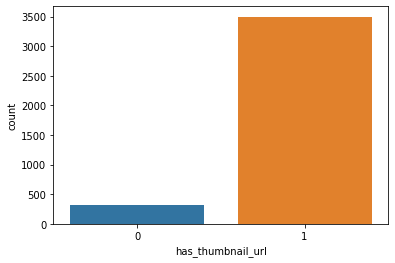

In [32]:
ax = sns.countplot(x="has_thumbnail_url", data=dataset)

medium_url column

In [33]:
#creating new has_medium_url column
has_medium_url = pd.DataFrame(columns=['has_medium_url'])
dataset = pd.concat([dataset, has_medium_url], axis=1)

In [34]:
j = 0
for i in dataset['medium_url']:
    
    if str(dataset['medium_url'][j]) == 'nan':
       dataset['has_medium_url'][j]=0
    else:
       dataset['has_medium_url'][j]=1  
    j += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [35]:
#dropping thumbnail_url column
dataset.drop(['medium_url'], axis = 1,inplace=True)

In [36]:
dataset.head()

,summary,space,description,neighborhood_overview,notes,transit,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,...,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,has_thumbnail_url,has_medium_url
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,...,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,0,0
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,...,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,1,1
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,https://a2.muscache.com/ac/pictures/b4324e0f-a...,NaN,16708587,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,f,https://a1.muscache.com/ac/users/16708587/prof...,htt

In [37]:
dataset.value_counts('has_medium_url')

has_medium_url
1    3498
0     320
dtype: int64

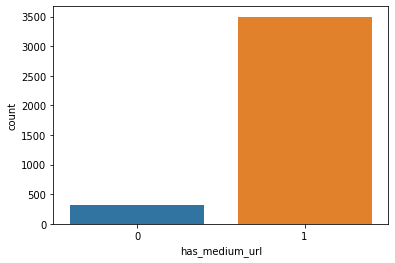

In [38]:
ax = sns.countplot(x="has_medium_url", data=dataset)

picture_url column

In [39]:
dataset['picture_url'].isnull().sum()

0

In [40]:
dataset.value_counts('picture_url')

picture_url
https://a2.muscache.com/ac/pictures/ff31a2ff-b918-4e6a-992b-98afaacd78a2.jpg?interpolation=lanczos-none&size=large_cover&output-format=jpg&output-quality=70    1
https://a1.muscache.com/ac/pictures/21962728/163f7bab_original.jpg?interpolation=lanczos-none&size=large_cover&output-format=jpg&output-quality=70              1
https://a1.muscache.com/ac/pictures/23547023/0f614ece_original.jpg?interpolation=lanczos-none&size=large_cover&output-format=jpg&output-quality=70              1
https://a1.muscache.com/ac/pictures/234452/3f9c1213_original.jpg?interpolation=lanczos-none&size=large_cover&output-format=jpg&output-quality=70                1
https://a1.muscache.com/ac/pictures/23291755/ec210bbe_original.jpg?interpolation=lanczos-none&size=large_cover&output-format=jpg&output-quality=70              1
                                                                                                                                                               ..
https://a2.musca

In [41]:
dataset.drop(['picture_url'], axis = 1,inplace=True)

xl_picture_url column

In [42]:
dataset['xl_picture_url'].isnull().sum()

320

In [43]:
#creating new has_xl_picture_url column
has_xl_picture_url = pd.DataFrame(columns=['has_xl_picture_url'])
dataset = pd.concat([dataset, has_xl_picture_url], axis=1)

In [44]:
j = 0
for i in dataset['xl_picture_url']:
    
    if str(dataset['xl_picture_url'][j]) == 'nan':
       dataset['has_xl_picture_url'][j]=0
    else:
       dataset['has_xl_picture_url'][j]=1  
    j += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [45]:
#dropping xl_picture_url column
dataset.drop(['xl_picture_url'], axis = 1,inplace=True)

In [46]:
dataset.value_counts('has_xl_picture_url')

has_xl_picture_url
1    3498
0     320
dtype: int64

host_id column

In [47]:
dataset['host_id'].isnull().sum()

0

In [48]:
dataset.value_counts('host_id')

host_id
8534462     46
4962900     39
1243056     37
430709      36
3074414     34
            ..
21505796     1
21473544     1
21420064     1
21409235     1
13370163     1
Length: 2751, dtype: int64

In [49]:
dataset.drop(['host_id'], axis = 1,inplace=True)

host_url column

In [50]:
dataset['host_url'].isnull().sum()

0

In [51]:
dataset.value_counts('host_url')

host_url
https://www.airbnb.com/users/show/8534462     46
https://www.airbnb.com/users/show/4962900     39
https://www.airbnb.com/users/show/1243056     37
https://www.airbnb.com/users/show/430709      36
https://www.airbnb.com/users/show/3074414     34
                                              ..
https://www.airbnb.com/users/show/39456755     1
https://www.airbnb.com/users/show/39455401     1
https://www.airbnb.com/users/show/39401590     1
https://www.airbnb.com/users/show/3939559      1
https://www.airbnb.com/users/show/10014839     1
Length: 2751, dtype: int64

In [52]:
dataset.drop(['host_url'], axis = 1,inplace=True)

In [53]:
dataset.head()

,summary,space,description,neighborhood_overview,notes,transit,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,...,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,has_thumbnail_url,has_medium_url,has_xl_picture_url
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,0,0,0
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,...,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,1,1,1
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,f,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t,Hous

host_name column

In [54]:
dataset.drop(['host_name'], axis = 1,inplace=True)

host_since column

In [55]:
dataset['host_since'].isnull().sum()

2

In [56]:
#dropping the 2 rows which have null values in host_since column
dataset = dataset.dropna(axis=0, subset=['host_since'])
dataset['host_since'].isnull().sum()

0

In [57]:
#new host_since_year column
dataset['host_since_year']=dataset['host_since'].astype('str').transform(lambda x: int(x.split("-")[0])).astype(int)

In [58]:
dataset.head()

,summary,space,description,neighborhood_overview,notes,transit,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,...,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,has_thumbnail_url,has_medium_url,has_xl_picture_url,host_since_year
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,...,NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,0,0,0,2011
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,...,NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,1,1,1,2013
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,f,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,...,NaN,$975.00,NaN,NaN,"$1,000.00",$300.00,10,$25.00,4,30,5 weeks ago,t,1,6,1

In [59]:
dataset.drop(['host_since'], axis = 1,inplace=True)

In [60]:
dataset['host_since_years']=2021-dataset['host_since_year']

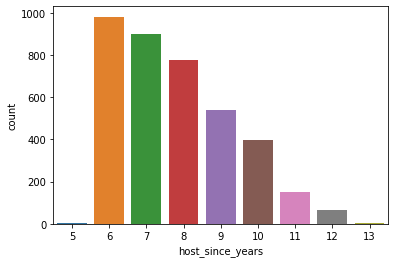

In [61]:
ax = sns.countplot(x="host_since_years", data=dataset)

In [62]:
dataset.head()

,summary,space,description,neighborhood_overview,notes,transit,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,has_thumbnail_url,has_medium_url,has_xl_picture_url,host_since_year,host_since_years
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,0,0,0,2011,10
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...","Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,1,1,1,2013,8
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,f,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,...,$975.00,NaN,NaN,"$1,000.00",$300.00,10,$25.00,4,30,5 weeks ago,t,1,6,17,220,2016-01-04,20,2014-07-3

In [63]:
dataset.drop(['host_since_year'], axis = 1,inplace=True)
dataset.shape

(3816, 82)

host_location column

In [64]:
dataset['host_location'].isnull().sum()

6

In [65]:
dataset['host_location']=dataset['host_location'].fillna('Unknown')
dataset['host_location'].isnull().sum()

0

In [66]:
dataset.value_counts('host_location')

host_location
Seattle, Washington, United States          3259
US                                           246
Spokane, Washington, United States            41
Kent, Washington, United States               34
Los Angeles, California, United States        13
                                            ... 
Phoenix, Arizona, United States                1
Port Orchard, Washington, United States        1
Port Townsend, Washington, United States       1
Prescott Valley, Arizona, United States        1
Accra, Greater Accra, Ghana                    1
Length: 121, dtype: int64

In [67]:
#creating new host_from_seattle column
host_from_seattle = pd.DataFrame(columns=['host_from_seattle'])
dataset = pd.concat([dataset, host_from_seattle], axis=1)

In [68]:
for i in range(len(dataset['host_location'])):
  if str(dataset['host_location'].iloc[i]) == "Seattle, Washington, United States":
    dataset['host_from_seattle'].iloc[i]=1
  else:
    dataset['host_from_seattle'].iloc[i]=0 


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [69]:
dataset.value_counts('host_from_seattle')

host_from_seattle
1    3259
0     557
dtype: int64

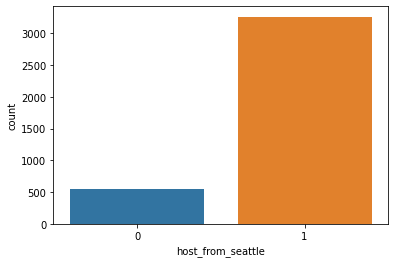

In [70]:
ax = sns.countplot(x="host_from_seattle", data=dataset)

In [71]:
dataset.drop(['host_location'], axis = 1,inplace=True)
dataset.head()

,summary,space,description,neighborhood_overview,notes,transit,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,has_thumbnail_url,has_medium_url,has_xl_picture_url,host_since_years,host_from_seattle
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,"I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,...,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,0,0,0,10,1
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,...,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,1,1,1,8,1
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,f,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,...,$975.00,NaN,NaN,"$1,000.00",$300.00,10,$25.00,4,30,5 weeks ago,t,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15,0,0,0,7,

host_about column

In [72]:
dataset.value_counts('host_about')

host_about
It would be my pleasure to share and explore this wonderful city with you!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               46
Stay Alfred was created based on 

In [73]:
dataset['host_about'].isnull().sum()

857

In [74]:
#creating new host_has_about column
host_has_about = pd.DataFrame(columns=['host_has_about'])
dataset = pd.concat([dataset, host_has_about], axis=1)

In [75]:
for i in range(len(dataset['host_about'])):
  if str(dataset['host_about'].iloc[i]) == 'nan':
    dataset['host_has_about'].iloc[i]=0
  else:
    dataset['host_has_about'].iloc[i]=1


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


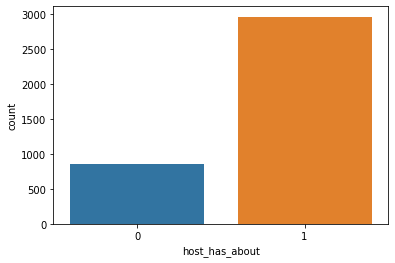

In [76]:
ax = sns.countplot(x="host_has_about", data=dataset)

In [77]:
dataset.drop(['host_about'], axis = 1,inplace=True)
dataset.head()

,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,...,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,has_thumbnail_url,has_medium_url,has_xl_picture_url,host_since_years,host_from_seattle,host_has_about
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",...,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,0,0,0,10,1,1
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",...,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,1,1,1,8,1,1
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,within a few hours,67%,100%,f,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",...,NaN,NaN,"$1,000.00",$300.00,10,$25.00,4,30,5 weeks ago,t,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15,

host_response_time column

In [78]:
dataset['host_response_time'].isnull().sum()

521

In [79]:
dataset['host_response_time']=dataset['host_response_time'].fillna('no response')
dataset['host_response_time'].isnull().sum()

0

In [80]:
dataset.value_counts('host_response_time')

host_response_time
within an hour        1692
within a few hours     968
within a day           597
no response            521
a few days or more      38
dtype: int64

In [81]:
#encoding host_respone_time column
dataset['host_response_time']=dataset['host_response_time'].map({'a few days or more':1,'within a day': 2,'within a few hours': 3,'within an hour': 4,'no response': 0})

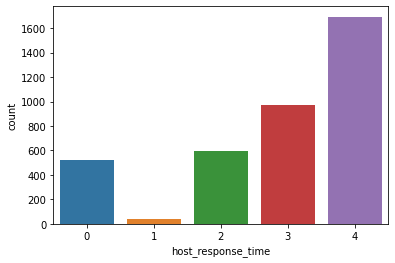

In [82]:
ax = sns.countplot(x="host_response_time", data=dataset)

In [83]:
dataset.head()

,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,...,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,has_thumbnail_url,has_medium_url,has_xl_picture_url,host_since_years,host_from_seattle,host_has_about
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,3,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",...,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,0,0,0,10,1,1
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",4,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",...,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,1,1,1,8,1,1
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,3,67%,100%,f,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",...,NaN,NaN,"$1,000.00",$300.00,10,$25.00,4,30,5 weeks ago,t,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15,0,0,0,7,1,1
3,A charming apartment that sits at

In [84]:
dataset.isnull().values.any()

True

host_response_rate column

In [85]:
dataset['host_response_rate'].isnull().sum()  

521

In [86]:
dataset.value_counts('host_response_rate')

host_response_rate
100%    2371
90%      165
80%      104
99%       78
88%       66
50%       52
94%       46
67%       41
89%       32
75%       32
86%       30
96%       28
98%       28
70%       25
97%       21
83%       20
60%       20
92%       18
93%       18
33%       14
40%       12
63%       11
95%        8
78%        8
71%        8
91%        5
43%        4
76%        3
64%        3
25%        3
87%        3
17%        2
58%        2
57%        2
82%        2
69%        1
30%        1
31%        1
53%        1
38%        1
55%        1
56%        1
81%        1
65%        1
68%        1
dtype: int64

In [87]:
dataset['host_response_rate']=dataset['host_response_rate'].fillna('0%')
dataset['host_response_rate'].isnull().sum()

0

In [88]:
dataset.value_counts('host_response_rate')

host_response_rate
100%    2371
0%       521
90%      165
80%      104
99%       78
88%       66
50%       52
94%       46
67%       41
89%       32
75%       32
86%       30
96%       28
98%       28
70%       25
97%       21
83%       20
60%       20
92%       18
93%       18
33%       14
40%       12
63%       11
71%        8
78%        8
95%        8
91%        5
43%        4
25%        3
64%        3
76%        3
87%        3
58%        2
57%        2
82%        2
17%        2
56%        1
55%        1
53%        1
65%        1
68%        1
38%        1
81%        1
31%        1
30%        1
69%        1
dtype: int64

In [89]:
#encoding host_response_rate column
for i in range(len(dataset['host_response_rate'])):
 if dataset['host_response_rate'].iloc[i] =='0%':
  dataset['host_response_rate'].iloc[i]=0
 
 elif dataset['host_response_rate'].iloc[i]=='100%':
  dataset['host_response_rate'].iloc[i]=3

 elif '1%' <=dataset['host_response_rate'].iloc[i]< '50%':
  dataset['host_response_rate'].iloc[i]=1
 
 elif '50%' <=dataset['host_response_rate'].iloc[i]<= '99%':
  dataset['host_response_rate'].iloc[i]=2 


dataset.value_counts('host_response_rate')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


host_response_rate
3    2371
2     886
0     521
1      38
dtype: int64

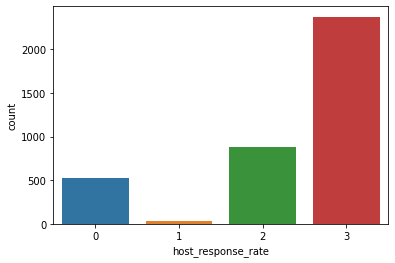

In [90]:
ax = sns.countplot(x="host_response_rate", data=dataset)

In [91]:
dataset.head()

,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,...,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,has_thumbnail_url,has_medium_url,has_xl_picture_url,host_since_years,host_from_seattle,host_has_about
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,3,2,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",...,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,0,0,0,10,1,1
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",4,2,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",...,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,1,1,1,8,1,1
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,3,2,100%,f,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",...,NaN,NaN,"$1,000.00",$300.00,10,$25.00,4,30,5 weeks ago,t,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15,0,0,0,7,1,1
3,A charming apartment that sits atop Que

host_acceptance_rate column

In [92]:
dataset.value_counts('host_acceptance_rate')

host_acceptance_rate
100%    3044
0%         1
dtype: int64

In [93]:
dataset['host_acceptance_rate'].isnull().sum()

771

In [94]:
dataset['host_acceptance_rate']=dataset['host_acceptance_rate'].fillna('unknown%')
dataset.value_counts('host_acceptance_rate')

host_acceptance_rate
100%        3044
unknown%     771
0%             1
dtype: int64

In [95]:
dataset.loc[(dataset['host_acceptance_rate'] == '0%')| ( dataset['host_acceptance_rate'] == 'unknown%'), 'host_acceptance_rate'] = 'Other'
dataset.value_counts('host_acceptance_rate')

host_acceptance_rate
100%     3044
Other     772
dtype: int64

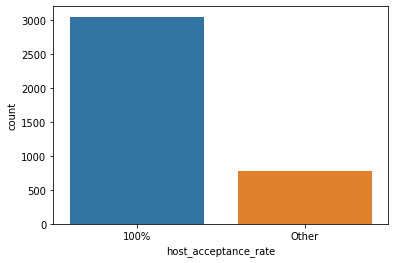

In [96]:
ax = sns.countplot(x="host_acceptance_rate", data=dataset)

In [97]:
#Label Encoding host_acceptance_rate column
from sklearn.preprocessing import LabelEncoder
dataset['host_acceptance_rate'] = LabelEncoder().fit_transform(dataset['host_acceptance_rate'])

dataset.head()

,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,...,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,has_thumbnail_url,has_medium_url,has_xl_picture_url,host_since_years,host_from_seattle,host_has_about
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,3,2,0,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",...,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,0,0,0,10,1,1
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",4,2,0,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",...,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,1,1,1,8,1,1
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,3,2,0,f,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",...,NaN,NaN,"$1,000.00",$300.00,10,$25.00,4,30,5 weeks ago,t,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15,0,0,0,7,1,1
3,A charming apartment that sits atop Queen Anne..

host_is_superhost column

In [98]:
dataset['host_is_superhost'].isnull().sum()

0

In [99]:
dataset.value_counts('host_is_superhost')

host_is_superhost
f    3038
t     778
dtype: int64

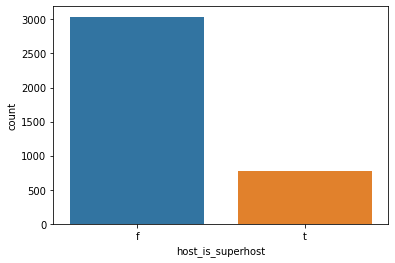

In [100]:
ax = sns.countplot(x="host_is_superhost", data=dataset)

In [101]:
#Label Encoding host_acceptance_rate column
from sklearn.preprocessing import LabelEncoder
dataset['host_is_superhost'] = LabelEncoder().fit_transform(dataset['host_is_superhost'])

host_thumbnail_url column

In [102]:
dataset.value_counts('host_thumbnail_url')

host_thumbnail_url
https://a2.muscache.com/ac/pictures/a4d7d053-c04c-47c2-8264-1163be7a4902.jpg?interpolation=lanczos-none&crop=w:w;*,*&crop=h:h;*,*&resize=50:*&output-format=jpg&output-quality=70     46
https://a1.muscache.com/ac/users/4962900/profile_pic/1405970987/original.jpg?interpolation=lanczos-none&crop=w:w;*,*&crop=h:h;*,*&resize=50:*&output-format=jpg&output-quality=70     39
https://a0.muscache.com/ac/users/1243056/profile_pic/1334570930/original.jpg?interpolation=lanczos-none&crop=w:w;*,*&crop=h:h;*,*&resize=50:*&output-format=jpg&output-quality=70     37
https://a2.muscache.com/ac/users/430709/profile_pic/1407448665/original.jpg?interpolation=lanczos-none&crop=w:w;*,*&crop=h:h;*,*&resize=50:*&output-format=jpg&output-quality=70      36
https://a2.muscache.com/ac/users/3074414/profile_pic/1408093668/original.jpg?interpolation=lanczos-none&crop=w:w;*,*&crop=h:h;*,*&resize=50:*&output-format=jpg&output-quality=70     34
                                                        

In [103]:
dataset['host_thumbnail_url'].isnull().sum()

0

In [104]:
dataset.drop(['host_thumbnail_url'], axis = 1,inplace=True)

host_picture_url column

In [105]:
dataset['host_picture_url'].isnull().sum()

0

In [106]:
dataset.drop(['host_picture_url'], axis = 1,inplace=True)

host_neighbourhood column

In [107]:
dataset['host_neighbourhood'].isnull().sum()

298

In [108]:
dataset.value_counts('host_neighbourhood')

host_neighbourhood
Capitol Hill          405
Belltown              254
Ballard               210
Minor                 191
Queen Anne            189
                     ... 
Forestland              1
Huntington Beach        1
Santa Monica            1
Roxhill                 1
North College Park      1
Length: 102, dtype: int64

In [109]:
dataset['host_neighbourhood']=dataset['host_neighbourhood'].fillna('Unknown')
dataset.value_counts('host_neighbourhood')

host_neighbourhood
Capitol Hill            405
Unknown                 298
Belltown                254
Ballard                 210
Minor                   191
                       ... 
Roxhill                   1
Central San Pedro         1
Clairemont Mesa East      1
Downtown Toronto          1
Northwest District        1
Length: 103, dtype: int64

In [110]:
dataset.value_counts('host_neighbourhood').nlargest(40)

host_neighbourhood
Capitol Hill                 405
Unknown                      298
Belltown                     254
Ballard                      210
Minor                        191
Queen Anne                   189
Fremont                      147
Wallingford                  134
North Beacon Hill            101
Ravenna                      100
Central Business District     93
Stevens                       87
First Hill                    85
Greenwood                     80
University District           80
Lower Queen Anne              75
Columbia City                 61
Green Lake                    55
North Admiral                 53
Magnolia                      53
Phinney Ridge                 52
Atlantic                      49
Leschi                        46
Mount Baker                   44
Eastlake                      42
Maple Leaf                    40
Madrona                       40
The Junction                  39
Roosevelt                     32
Pike Place Market       

In [111]:
need = dataset['host_neighbourhood'].value_counts().index[:40]
dataset['host_neighbourhood'] = np.where(dataset['host_neighbourhood'].isin(need), dataset['host_neighbourhood'], 'Other')
dataset.value_counts('host_neighbourhood')
#keeping all the categories in the top 40, and combining the rest into 1 single category called 'Óther'

host_neighbourhood
Other                        422
Capitol Hill                 405
Unknown                      298
Belltown                     254
Ballard                      210
Minor                        191
Queen Anne                   189
Fremont                      147
Wallingford                  134
North Beacon Hill            101
Ravenna                      100
Central Business District     93
Stevens                       87
First Hill                    85
University District           80
Greenwood                     80
Lower Queen Anne              75
Columbia City                 61
Green Lake                    55
Magnolia                      53
North Admiral                 53
Phinney Ridge                 52
Atlantic                      49
Leschi                        46
Mount Baker                   44
Eastlake                      42
Madrona                       40
Maple Leaf                    40
The Junction                  39
Roosevelt               

In [112]:
#onehot encoding host_neighbourhood Column
dataset= pd.get_dummies(dataset,columns=['host_neighbourhood'], prefix_sep='_', drop_first=True)
dataset.head(3)

,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,...,host_neighbourhood_Atlantic,host_neighbourhood_Ballard,host_neighbourhood_Belltown,host_neighbourhood_Bryant,host_neighbourhood_Capitol Hill,host_neighbourhood_Central Business District,host_neighbourhood_Columbia City,host_neighbourhood_Crown Hill,host_neighbourhood_Eastlake,host_neighbourhood_First Hill,host_neighbourhood_Fremont,host_neighbourhood_Gatewood,host_neighbourhood_Genesee,host_neighbourhood_Green Lake,host_neighbourhood_Greenwood,host_neighbourhood_Leschi,host_neighbourhood_Lower Queen Anne,host_neighbourhood_Madison Park,host_neighbourhood_Madrona,host_neighbourhood_Magnolia,host_neighbourhood_Maple Leaf,host_neighbourhood_Minor,host_neighbourhood_Montlake,host_neighbourhood_Mount Baker,host_neighbourhood_North Admiral,host_neighbourhood_North Beacon Hill,host_neighbourhood_North Delridge,host_neighbourhood_Other,host_neighbourhood_Phinney Ridge,host_neighbourhood_Pike Place Market,host_neighbourhood_Queen Anne,host_neighbourhood_Rainier Beach,host_neighbourhood_Ravenna,host_neighbourhood_Roosevelt,host_neighbourhood_Seward Park,host_neighbourhood_Stevens,host_neighbourhood_The Junction,host_neighbourhood_University District,host_neighbourhood_Unknown,host_neighbourhood_Wallingford
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,3,2,0,0,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",4,2,0,1,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00",...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,3,2,0,0,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$975.00,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


host_listings_count column

In [113]:
dataset['host_listings_count'].isnull().sum()

0

In [114]:
dataset['host_listings_count'].value_counts()

1.0      2179
2.0       620
3.0       261
4.0       151
5.0        98
34.0       67
6.0        48
48.0       46
169.0      39
37.0       37
36.0       36
7.0        30
9.0        28
10.0       26
8.0        23
11.0       22
21.0       21
18.0       19
17.0       16
13.0       12
12.0       12
354.0      10
19.0        4
163.0       4
15.0        3
84.0        2
502.0       2
Name: host_listings_count, dtype: int64

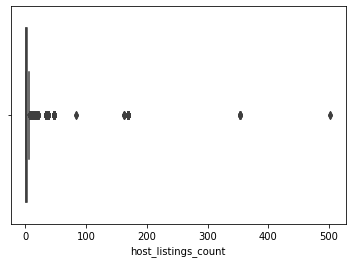

In [115]:
sns.boxplot(x=dataset['host_listings_count'])   #this shows that we have outliers

In [116]:
# We replace all records with host_listings_count > 80 by 80 to remove the outliers
dataset.loc[(dataset.host_listings_count >80),"host_listings_count"]=80

In [117]:
dataset.value_counts('host_listings_count')

host_listings_count
1.0     2179
2.0      620
3.0      261
4.0      151
5.0       98
34.0      67
80.0      57
6.0       48
48.0      46
37.0      37
36.0      36
7.0       30
9.0       28
10.0      26
8.0       23
11.0      22
21.0      21
18.0      19
17.0      16
13.0      12
12.0      12
19.0       4
15.0       3
dtype: int64

host_total_listings_count column

In [118]:
dataset['host_total_listings_count'].isnull().sum()

0

In [119]:
dataset['host_total_listings_count'].value_counts()

1.0      2179
2.0       620
3.0       261
4.0       151
5.0        98
34.0       67
6.0        48
48.0       46
169.0      39
37.0       37
36.0       36
7.0        30
9.0        28
10.0       26
8.0        23
11.0       22
21.0       21
18.0       19
17.0       16
13.0       12
12.0       12
354.0      10
19.0        4
163.0       4
15.0        3
84.0        2
502.0       2
Name: host_total_listings_count, dtype: int64

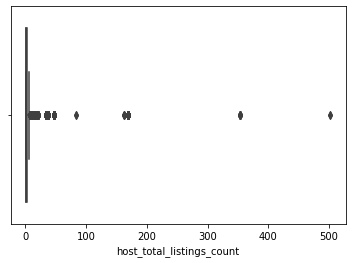

In [120]:
sns.boxplot(x=dataset['host_total_listings_count'])

In [121]:
# We replace all records with host_listings_count > 80 by 80 to remove the outliers
dataset.loc[(dataset.host_total_listings_count >80),"host_total_listings_count"]=80

In [122]:
dataset.head()

,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,...,host_neighbourhood_Atlantic,host_neighbourhood_Ballard,host_neighbourhood_Belltown,host_neighbourhood_Bryant,host_neighbourhood_Capitol Hill,host_neighbourhood_Central Business District,host_neighbourhood_Columbia City,host_neighbourhood_Crown Hill,host_neighbourhood_Eastlake,host_neighbourhood_First Hill,host_neighbourhood_Fremont,host_neighbourhood_Gatewood,host_neighbourhood_Genesee,host_neighbourhood_Green Lake,host_neighbourhood_Greenwood,host_neighbourhood_Leschi,host_neighbourhood_Lower Queen Anne,host_neighbourhood_Madison Park,host_neighbourhood_Madrona,host_neighbourhood_Magnolia,host_neighbourhood_Maple Leaf,host_neighbourhood_Minor,host_neighbourhood_Montlake,host_neighbourhood_Mount Baker,host_neighbourhood_North Admiral,host_neighbourhood_North Beacon Hill,host_neighbourhood_North Delridge,host_neighbourhood_Other,host_neighbourhood_Phinney Ridge,host_neighbourhood_Pike Place Market,host_neighbourhood_Queen Anne,host_neighbourhood_Rainier Beach,host_neighbourhood_Ravenna,host_neighbourhood_Roosevelt,host_neighbourhood_Seward Park,host_neighbourhood_Stevens,host_neighbourhood_The Junction,host_neighbourhood_University District,host_neighbourhood_Unknown,host_neighbourhood_Wallingford
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,3,2,0,0,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",4,2,0,1,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00",...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,3,2,0,0,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$975.00,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,0,0,1,0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"8th 

host_has_profile_pic column

In [123]:
dataset['host_has_profile_pic'].isnull().sum()

0

In [124]:
dataset['host_has_profile_pic'].value_counts()

t    3809
f       7
Name: host_has_profile_pic, dtype: int64

In [125]:
dataset.drop(['host_has_profile_pic'], axis = 1,inplace=True)

host_identity_verified column

In [126]:
dataset['host_identity_verified'].isnull().sum()

0

In [127]:
dataset['host_identity_verified'].value_counts()

t    2997
f     819
Name: host_identity_verified, dtype: int64

In [128]:
#Label Encoding host_identity_verified column
from sklearn.preprocessing import LabelEncoder
dataset['host_identity_verified'] = LabelEncoder().fit_transform(dataset['host_identity_verified'])
dataset.head()

,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,...,host_neighbourhood_Atlantic,host_neighbourhood_Ballard,host_neighbourhood_Belltown,host_neighbourhood_Bryant,host_neighbourhood_Capitol Hill,host_neighbourhood_Central Business District,host_neighbourhood_Columbia City,host_neighbourhood_Crown Hill,host_neighbourhood_Eastlake,host_neighbourhood_First Hill,host_neighbourhood_Fremont,host_neighbourhood_Gatewood,host_neighbourhood_Genesee,host_neighbourhood_Green Lake,host_neighbourhood_Greenwood,host_neighbourhood_Leschi,host_neighbourhood_Lower Queen Anne,host_neighbourhood_Madison Park,host_neighbourhood_Madrona,host_neighbourhood_Magnolia,host_neighbourhood_Maple Leaf,host_neighbourhood_Minor,host_neighbourhood_Montlake,host_neighbourhood_Mount Baker,host_neighbourhood_North Admiral,host_neighbourhood_North Beacon Hill,host_neighbourhood_North Delridge,host_neighbourhood_Other,host_neighbourhood_Phinney Ridge,host_neighbourhood_Pike Place Market,host_neighbourhood_Queen Anne,host_neighbourhood_Rainier Beach,host_neighbourhood_Ravenna,host_neighbourhood_Roosevelt,host_neighbourhood_Seward Park,host_neighbourhood_Stevens,host_neighbourhood_The Junction,host_neighbourhood_University District,host_neighbourhood_Unknown,host_neighbourhood_Wallingford
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,3,2,0,0,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",1,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",4,2,0,1,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",1,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,3,2,0,0,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",1,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$975.00,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,0,0,1,0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1,

street column

In [129]:
dataset['street'].value_counts()

1st Avenue, Seattle, WA 98101, United States           30
12th Avenue East, Seattle, WA 98102, United States     29
Hubbell Place, Seattle, WA 98101, United States        29
10th Avenue East, Seattle, WA 98102, United States     28
East Denny Way, Seattle, WA 98122, United States       28
                                                       ..
Minor Ave, Seattle, WA 98104, United States             1
Baker Ave NW, Seattle, WA 98107, United States          1
North 82nd Street, Seattle, WA 98103, United States     1
44th Ave SW, Seattle, WA 98116, United States           1
S Plum St, Seattle, WA 98144, United States             1
Name: street, Length: 1442, dtype: int64

In [130]:
#dropping this column
dataset.drop(['street'], axis = 1,inplace=True)

neighbourhood column

In [131]:
dataset['neighbourhood'].isnull().sum()

416

In [132]:
dataset['neighbourhood'].value_counts()

Capitol Hill          351
Ballard               213
Belltown              202
Minor                 192
Queen Anne            187
                     ... 
South Beacon Hill       2
Pike Market             2
Roxhill                 1
North College Park      1
Fairmount Park          1
Name: neighbourhood, Length: 81, dtype: int64

In [133]:
dataset['neighbourhood']=dataset['neighbourhood'].fillna('Unknown')
dataset.value_counts('neighbourhood')

neighbourhood
Unknown               416
Capitol Hill          351
Ballard               213
Belltown              202
Minor                 192
                     ... 
South Park              2
Pike Market             2
Fairmount Park          1
Roxhill                 1
North College Park      1
Length: 82, dtype: int64

In [134]:
dataset.value_counts('neighbourhood').nlargest(20)

neighbourhood
Unknown                      416
Capitol Hill                 351
Ballard                      213
Belltown                     202
Minor                        192
Queen Anne                   187
Fremont                      148
Wallingford                  143
University District          107
First Hill                   105
Stevens                       98
North Beacon Hill             95
Lower Queen Anne              83
Central Business District     81
Greenwood                     79
Columbia City                 61
Ravenna                       59
Phinney Ridge                 56
Magnolia                      55
Green Lake                    52
dtype: int64

In [135]:
need = dataset['neighbourhood'].value_counts().index[:20]
dataset['neighbourhood'] = np.where(dataset['neighbourhood'].isin(need), dataset['neighbourhood'], 'Other')
dataset.value_counts('neighbourhood')

neighbourhood
Other                        1033
Unknown                       416
Capitol Hill                  351
Ballard                       213
Belltown                      202
Minor                         192
Queen Anne                    187
Fremont                       148
Wallingford                   143
University District           107
First Hill                    105
Stevens                        98
North Beacon Hill              95
Lower Queen Anne               83
Central Business District      81
Greenwood                      79
Columbia City                  61
Ravenna                        59
Phinney Ridge                  56
Magnolia                       55
Green Lake                     52
dtype: int64

In [136]:
#onehot encoding neighbourhood Column
dataset= pd.get_dummies(dataset,columns=['neighbourhood'], prefix_sep='_', drop_first=True)
dataset.head(3)

,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,...,host_neighbourhood_Maple Leaf,host_neighbourhood_Minor,host_neighbourhood_Montlake,host_neighbourhood_Mount Baker,host_neighbourhood_North Admiral,host_neighbourhood_North Beacon Hill,host_neighbourhood_North Delridge,host_neighbourhood_Other,host_neighbourhood_Phinney Ridge,host_neighbourhood_Pike Place Market,host_neighbourhood_Queen Anne,host_neighbourhood_Rainier Beach,host_neighbourhood_Ravenna,host_neighbourhood_Roosevelt,host_neighbourhood_Seward Park,host_neighbourhood_Stevens,host_neighbourhood_The Junction,host_neighbourhood_University District,host_neighbourhood_Unknown,host_neighbourhood_Wallingford,neighbourhood_Belltown,neighbourhood_Capitol Hill,neighbourhood_Central Business District,neighbourhood_Columbia City,neighbourhood_First Hill,neighbourhood_Fremont,neighbourhood_Green Lake,neighbourhood_Greenwood,neighbourhood_Lower Queen Anne,neighbourhood_Magnolia,neighbourhood_Minor,neighbourhood_North Beacon Hill,neighbourhood_Other,neighbourhood_Phinney Ridge,neighbourhood_Queen Anne,neighbourhood_Ravenna,neighbourhood_Stevens,neighbourhood_University District,neighbourhood_Unknown,neighbourhood_Wallingford
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,3,2,0,0,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",1,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",4,2,0,1,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",1,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,3,2,0,0,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",1,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$975.00,NaN,NaN,"$1,000.00",$300.00,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


neighbourhood_group_cleansed column

<BarContainer object of 10 artists>

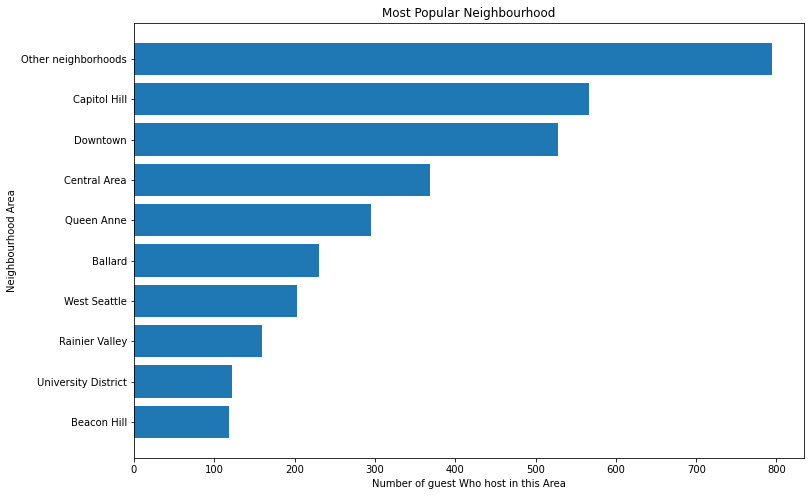

In [137]:
data = dataset.neighbourhood_group_cleansed.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.barh(x, y)

In [138]:
dataset['neighbourhood_group_cleansed'].isnull().sum()

0

In [139]:
dataset.value_counts('neighbourhood_group_cleansed')

neighbourhood_group_cleansed
Other neighborhoods    794
Capitol Hill           567
Downtown               528
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
dtype: int64

In [140]:
import plotly.express as px
fig = px.scatter(dataset, x='longitude', y='latitude',color='neighbourhood_group_cleansed') 
fig.update_layout(xaxis_title="longitude",yaxis_title="latitude")
fig.show()

In [141]:
need = dataset['neighbourhood_group_cleansed'].value_counts().index[:10]
dataset['neighbourhood_group_cleansed'] = np.where(dataset['neighbourhood_group_cleansed'].isin(need), dataset['neighbourhood_group_cleansed'], 'Other')
dataset.value_counts('neighbourhood_group_cleansed')

neighbourhood_group_cleansed
Other neighborhoods    794
Capitol Hill           567
Downtown               528
Other                  431
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
dtype: int64

In [142]:
#onehot encoding neighbourhood_group_cleansed Column
dataset= pd.get_dummies(dataset,columns=['neighbourhood_group_cleansed'], prefix_sep='_', drop_first=True)
dataset.head(3)

,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,...,host_neighbourhood_Queen Anne,host_neighbourhood_Rainier Beach,host_neighbourhood_Ravenna,host_neighbourhood_Roosevelt,host_neighbourhood_Seward Park,host_neighbourhood_Stevens,host_neighbourhood_The Junction,host_neighbourhood_University District,host_neighbourhood_Unknown,host_neighbourhood_Wallingford,neighbourhood_Belltown,neighbourhood_Capitol Hill,neighbourhood_Central Business District,neighbourhood_Columbia City,neighbourhood_First Hill,neighbourhood_Fremont,neighbourhood_Green Lake,neighbourhood_Greenwood,neighbourhood_Lower Queen Anne,neighbourhood_Magnolia,neighbourhood_Minor,neighbourhood_North Beacon Hill,neighbourhood_Other,neighbourhood_Phinney Ridge,neighbourhood_Queen Anne,neighbourhood_Ravenna,neighbourhood_Stevens,neighbourhood_University District,neighbourhood_Unknown,neighbourhood_Wallingford,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Other,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,3,2,0,0,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",1,West Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",4,2,0,1,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",1,West Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,3,2,0,0,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",1,West Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$975.00,NaN,NaN,"$1,000.00",$300.00,10,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


neighbourhood_cleansed column

In [143]:
dataset['neighbourhood_cleansed'].isnull().sum()

0

In [144]:
dataset.value_counts('neighbourhood_cleansed').nlargest(30)

neighbourhood_cleansed
Broadway                     397
Belltown                     232
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Greenwood                     89
East Queen Anne               82
North Beacon Hill             78
Phinney Ridge                 73
Adams                         70
Mann                          67
Ravenna                       67
West Queen Anne               65
West Woodland                 64
Columbia City                 58
Green Lake                    54
North Queen Anne              54
Leschi                        53
Atlantic                      53
Loyal Heights                 52
Mount Baker                   50
North Admiral                 49
Madrona                       47
Eastlake                      45
Seward Park         

In [145]:
need = dataset['neighbourhood_cleansed'].value_counts().index[:30]
dataset['neighbourhood_cleansed'] = np.where(dataset['neighbourhood_cleansed'].isin(need), dataset['neighbourhood_cleansed'], 'Other')
dataset.value_counts('neighbourhood_cleansed')

neighbourhood_cleansed
Other                        967
Broadway                     397
Belltown                     232
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Greenwood                     89
East Queen Anne               82
North Beacon Hill             78
Phinney Ridge                 73
Adams                         70
Ravenna                       67
Mann                          67
West Queen Anne               65
West Woodland                 64
Columbia City                 58
Green Lake                    54
North Queen Anne              54
Leschi                        53
Atlantic                      53
Loyal Heights                 52
Mount Baker                   50
North Admiral                 49
Madrona                       47
Eastlake            

In [146]:
#ax = sns.boxplot(data=dataset, x='neighbourhood_group_cleansed', y='price', fliersize=0.1)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.set_ylim(0, 400);

In [147]:
dataset= pd.get_dummies(dataset,columns=['neighbourhood_cleansed'], prefix_sep='_', drop_first=True)
dataset.head(3)

,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,...,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Other,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Other,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_University District,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,3,2,0,0,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",1,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",4,2,0,1,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",1,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,3,2,0,0,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",1,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$975.00,NaN,NaN,"$1,000.00",$300.00,10,$25.00,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


city column

In [148]:
dataset.value_counts('city')

city
Seattle                  3808
West Seattle                2
Seattle                     2
西雅图                         1
seattle                     1
Phinney Ridge Seattle       1
Ballard, Seattle            1
dtype: int64

In [149]:
dataset.drop(['city'], axis = 1,inplace=True)

state column

In [150]:
dataset.value_counts('state')

state
WA    3815
wa       1
dtype: int64

In [151]:
dataset.drop(['state'], axis = 1,inplace=True)

zipcode

In [152]:
dataset.drop(['zipcode'], axis = 1,inplace=True)

market column

In [153]:
dataset.value_counts('market')

market
Seattle    3816
dtype: int64

In [154]:
dataset.drop(['market'], axis = 1,inplace=True)

smart_location column

In [155]:
dataset.value_counts('smart_location')

smart_location
Seattle, WA                  3808
West Seattle, WA                2
Seattle , WA                    2
西雅图, WA                         1
seattle, wa                     1
Phinney Ridge Seattle, WA       1
Ballard, Seattle, WA            1
dtype: int64

In [156]:
dataset.drop(['smart_location'], axis = 1,inplace=True)

country_code,latitude,longitude,country columns

In [157]:
dataset.value_counts('country')

country
United States    3816
dtype: int64

In [158]:
dataset.drop(['country','country_code','latitude','longitude'], axis = 1,inplace=True)

is_location_exact column

In [159]:
dataset.value_counts('is_location_exact')

is_location_exact
t    3410
f     406
dtype: int64

In [160]:
#Label Encoding is_location_exact column
from sklearn.preprocessing import LabelEncoder
dataset['is_location_exact'] = LabelEncoder().fit_transform(dataset['is_location_exact'])
dataset.head()

,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,...,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Other,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Other,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_University District,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,3,2,0,0,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",1,1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",4,2,0,1,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",1,1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,3,2,0,0,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",1,1,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$975.00,NaN,NaN,"$1,000.00",$300.00,10,$25.00,4,30,5 weeks ago,t,1,6,17,220,2016-01-04,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,0,0,1,0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum..."

property_type column

In [161]:
dataset.value_counts('property_type')

property_type
House              1733
Apartment          1706
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
dtype: int64

In [162]:
dataset['property_type'].isnull().sum()

1

In [163]:
dataset['property_type']=dataset['property_type'].fillna('House')
dataset['property_type'].isnull().sum()

0

In [164]:
need = dataset['property_type'].value_counts().index[:2]
dataset['property_type'] = np.where(dataset['property_type'].isin(need), dataset['property_type'], 'Other')
dataset.value_counts('property_type')

property_type
House        1734
Apartment    1706
Other         376
dtype: int64

In [165]:
#onehot encoding property_type Column
dataset= pd.get_dummies(dataset,columns=['property_type'], prefix_sep='_', drop_first=True)
dataset.head(3)

,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,is_location_exact,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,...,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Other,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Other,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_University District,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,property_type_House,property_type_Other
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,3,2,0,0,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",1,1,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",4,2,0,1,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",1,1,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,3,2,0,0,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",1,1,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$975.00,NaN,NaN,"$1,000.00",$300.00,10,$25.00,4,30,5 weeks ago,t,1,6,17,220,2016-01-04,20,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


room_type column

In [166]:
dataset['room_type'].isnull().sum()

0

In [167]:
dataset.value_counts('room_type')

room_type
Entire home/apt    2539
Private room       1160
Shared room         117
dtype: int64

In [168]:
#onehot encoding room_type Column
dataset= pd.get_dummies(dataset,columns=['room_type'], prefix_sep='_', drop_first=True)

accomodates column

In [169]:
dataset['accommodates'].isnull().sum()

0

In [170]:
dataset.value_counts('accommodates')  #no outliers

accommodates
2     1625
4      785
3      398
6      332
1      256
5      184
8      119
7       52
10      25
12      15
9       13
16       4
14       3
11       3
15       2
dtype: int64

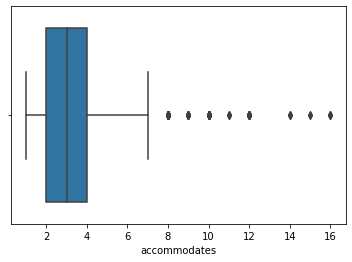

In [171]:
sns.boxplot(x=dataset['accommodates']) 

bathrooms column

In [172]:
dataset['bathrooms'].isnull().sum()

16

In [173]:
dataset.value_counts('bathrooms')

bathrooms
1.0    2880
2.0     373
1.5     248
2.5     124
3.0      64
3.5      57
0.5      31
4.0       8
0.0       8
4.5       3
8.0       2
5.0       2
dtype: int64

In [174]:
dataset['bathrooms'] = dataset['bathrooms'].fillna(dataset['bathrooms'].mode()[0])
dataset['bathrooms'].isnull().sum()

0

bedrooms column

In [175]:
dataset['bedrooms'].isnull().sum()

6

In [176]:
dataset.value_counts('bedrooms')

bedrooms
1.0    2416
2.0     640
0.0     371
3.0     283
4.0      69
5.0      24
6.0       6
7.0       1
dtype: int64

In [177]:
dataset['bedrooms'] = dataset['bedrooms'].fillna(dataset['bedrooms'].mode()[0])
dataset['bedrooms'].isnull().sum()

0

beds column

In [178]:
dataset['beds'].isnull().sum()

1

In [179]:
dataset.value_counts('beds')

beds
1.0     2199
2.0      912
3.0      433
4.0      152
5.0       73
6.0       21
7.0       14
9.0        4
8.0        4
10.0       2
15.0       1
dtype: int64

In [180]:
dataset['beds'] = dataset['beds'].fillna(dataset['beds'].mode()[0])
dataset['beds'].isnull().sum()

0

bed_type column

In [181]:
dataset['bed_type'].isnull().sum()

0

In [182]:
dataset.value_counts('bed_type')

bed_type
Real Bed         3655
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
dtype: int64

In [183]:
need = dataset['bed_type'].value_counts().index[:1]
dataset['bed_type'] = np.where(dataset['bed_type'].isin(need), dataset['bed_type'], 'Other')
dataset.value_counts('bed_type')

bed_type
Real Bed    3655
Other        161
dtype: int64

In [184]:
#Label Encoding is_location_exact column
from sklearn.preprocessing import LabelEncoder
dataset['bed_type'] = LabelEncoder().fit_transform(dataset['bed_type'])
dataset.head()

,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,...,neighbourhood_group_cleansed_Other,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Other,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_University District,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,property_type_House,property_type_Other,room_type_Private room,room_type_Shared room
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,3,2,0,0,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",1,1,4,1.0,1.0,1.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",4,2,0,1,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",1,1,4,1.0,1.0,1.0,1,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,3,2,0,0,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",1,1,11,4.5,5.0,7.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$975.00,NaN,NaN,"$1,000.00",$300.00,10,$25.00,4,30,5 weeks ago,t,1,6,17,220,2016-01-04,20,2014-07-30,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,0,0,1,0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1,1,3,1.0,0.0,2.0,1,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,$100.00,$650.00,"$2,300.00",NaN,NaN,1,$0.00

square_feet column

In [185]:
dataset['square_feet'].isnull().sum()  #since most values are null, we drop this column

3719

In [186]:
dataset.drop(['square_feet'], axis = 1,inplace=True)

price column

In [187]:
dataset['price'].isnull().sum()

0

In [188]:
dataset['price'] = dataset['price'].replace({'\$':''}, regex = True)

In [189]:
#dataset['price'].apply(lambda x: int(float(x)))
#dataset['price'].astype(float)
dataset["price"] = pd.to_numeric(dataset["price"], downcast="float",errors='coerce')
#had to add the coerce part, because one of the values in the column was giving a parsing error.
#what coerce does to convert bad non numeric values to NaN, so the one value that was giving a problem was made null

In [190]:
dataset['price'].isnull().sum()

1

In [191]:
dataset['price']=dataset['price'].replace(np.NaN,dataset['price'].mean())
dataset['price'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Price Distribution Plot')

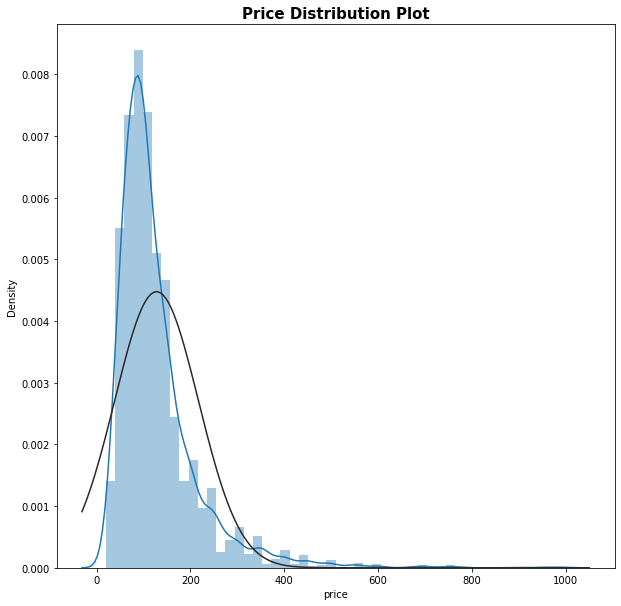

In [192]:
from scipy.stats import norm
plt.figure(figsize=(10,10))
sns.distplot(dataset['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

The above distribution graph shows that there is a right-skewed distribution on price. This means there is a positive skewness. Log transformation will be used to make this feature less skewed. This will help to make easier interpretation and better statistical analysis

Since division by zero is a problem, log+1 transformation would be better.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Log-Price Distribution Plot')

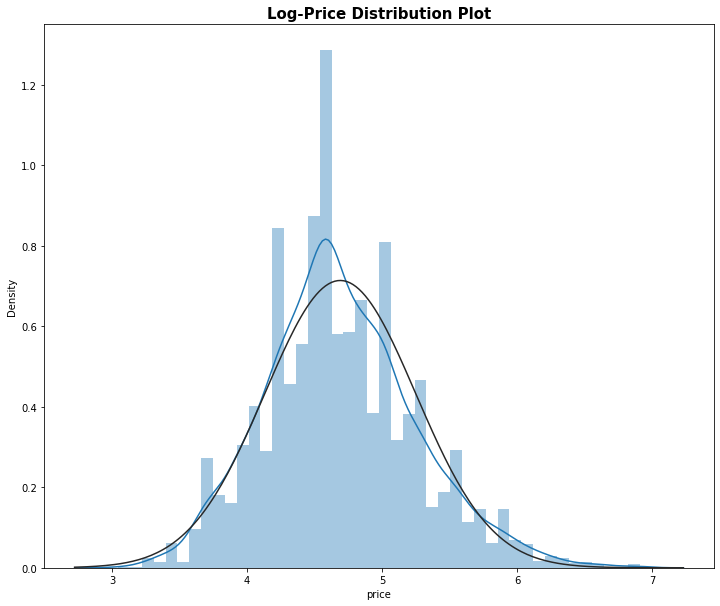

In [193]:
dataset['price'] = np.log(dataset.price+1)

plt.figure(figsize=(12,10))
sns.distplot(dataset['price'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')
#In below graph, the good fit indicates that normality is a reasonable approximation.

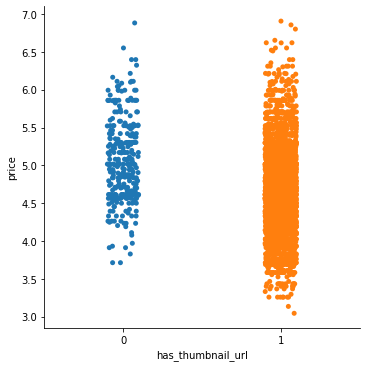

In [194]:
sns.catplot(x='has_thumbnail_url', y='price', data=dataset)

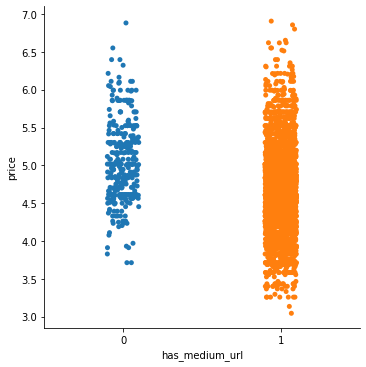

In [195]:
sns.catplot(x='has_medium_url', y='price', data=dataset)

weekly_price,security_deposit,cleaning_fee,extra_peope and monthly_price column

In [196]:
dataset.drop(['weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people'], axis = 1,inplace=True)

In [197]:
dataset.head(3)

,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,...,neighbourhood_group_cleansed_Other,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Other,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_University District,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,property_type_House,property_type_Other,room_type_Private room,room_type_Shared room
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,3,2,0,0,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",1,1,4,1.0,1.0,1.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4.454347,2,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",4,2,0,1,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",1,1,4,1.0,1.0,1.0,1,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",5.017280,1,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,3,2,0,0,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",1,1,11,4.5,5.0,7.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6.883462,10,4,30,5 weeks ago,t,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


guests_included column

In [198]:
dataset['guests_included'].isnull().sum()

0

In [199]:
dataset.value_counts('guests_included')

guests_included
1     2273
2      989
4      237
0       92
3       80
6       71
5       28
8       24
7       14
10       2
9        2
15       1
13       1
12       1
11       1
dtype: int64

minimum_nights column

In [200]:
dataset['minimum_nights'].isnull().sum()

0

In [201]:
dataset.value_counts('minimum_nights')

minimum_nights
1       1609
2       1422
3        480
4        122
5         67
7         50
6         16
14        16
20        11
30         6
10         5
13         2
8          1
1000       1
11         1
31         1
15         1
21         1
26         1
28         1
29         1
12         1
dtype: int64

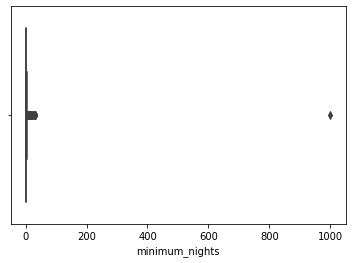

In [202]:
sns.boxplot(x=dataset['minimum_nights']) 

In [203]:
dataset.loc[(dataset.minimum_nights >30),"minimum_nights"]=30

maximum_nights column

In [204]:
dataset['maximum_nights'].isnull().sum()

0

In [205]:
dataset.value_counts('maximum_nights')

maximum_nights
1125      2452
30         183
365        148
14         123
7          108
          ... 
400          1
500          1
999          1
44           1
100000       1
Length: 68, dtype: int64

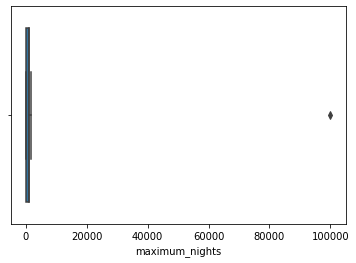

In [206]:
sns.boxplot(x=dataset['maximum_nights'])  #how can there be nights more than 365?

In [207]:
dataset.drop(['maximum_nights','calendar_updated'], axis = 1,inplace=True)

has_availability column

In [208]:
dataset['has_availability'].isnull().sum()

0

In [209]:
dataset.value_counts('has_availability')

has_availability
t    3816
dtype: int64

In [210]:
dataset.drop(['has_availability'], axis = 1,inplace=True)
dataset.head(3)

,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,minimum_nights,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,...,neighbourhood_group_cleansed_Other,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Other,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_University District,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,property_type_House,property_type_Other,room_type_Private room,room_type_Shared room
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,3,2,0,0,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",1,1,4,1.0,1.0,1.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4.454347,2,1,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",4,2,0,1,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",1,1,4,1.0,1.0,1.0,1,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",5.017280,1,2,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,3,2,0,0,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",1,1,11,4.5,5.0,7.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6.883462,10,4,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


availability_30,availability_60,availability_90,availability_365 columns

In [211]:
dataset['availability_30'].isnull().sum()

0

In [212]:
#percent of days available in a 30 day period
dataset['availability_30']=dataset['availability_30'].apply(lambda x: x/30)

In [213]:
dataset['availability_60'].isnull().sum()

0

In [214]:
#percent of days available in a 60 day period
dataset['availability_60']=dataset['availability_60'].apply(lambda x: x/60)

In [215]:
dataset['availability_90'].isnull().sum()

0

In [216]:
#percent of days available in a 90 day period
dataset['availability_90']=dataset['availability_90'].apply(lambda x: x/90)

In [217]:
dataset['availability_365'].isnull().sum()

0

In [218]:
#percent of days available in a 365 day period
dataset['availability_365']=dataset['availability_365'].apply(lambda x: x/365)

In [219]:
dataset.head()

,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,minimum_nights,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,...,neighbourhood_group_cleansed_Other,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Other,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_University District,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,property_type_House,property_type_Other,room_type_Private room,room_type_Shared room
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,3,2,0,0,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",1,1,4,1.0,1.0,1.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4.454347,2,1,0.466667,0.683333,0.788889,0.947945,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",4,2,0,1,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",1,1,4,1.0,1.0,1.0,1,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",5.017280,1,2,0.433333,0.216667,0.177778,0.797260,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,3,2,0,0,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",1,1,11,4.5,5.0,7.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6.883462,10,4,0.033333,0.100000,0.188889,0.602740,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,0,0,1,0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1,1

calender_last_scraped

In [220]:
dataset.drop(['calendar_last_scraped'], axis = 1,inplace=True)

number_of_reviews

In [221]:
dataset['number_of_reviews'].isnull().sum()

0

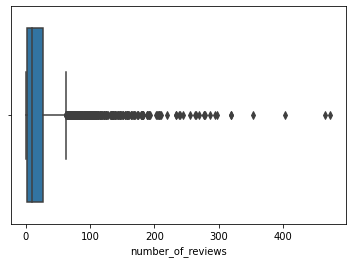

In [222]:
sns.boxplot(x=dataset['number_of_reviews'])

In [223]:
dataset.value_counts('number_of_reviews')

number_of_reviews
0      625
1      310
2      224
4      160
3      157
      ... 
98       1
170      1
173      1
466      1
474      1
Length: 195, dtype: int64

In [224]:
dataset.loc[(dataset.number_of_reviews >300),"number_of_reviews"]=300

review_scores_rating column

In [225]:
dataset['review_scores_rating'].isnull().sum()

645

In [226]:
dataset.value_counts('review_scores_rating')

review_scores_rating
100.0    781
98.0     292
96.0     278
97.0     266
95.0     260
94.0     198
93.0     184
99.0     146
90.0     138
80.0     111
92.0     105
91.0      97
87.0      55
89.0      53
88.0      47
85.0      24
84.0      23
86.0      17
83.0      13
60.0      12
82.0      10
70.0       8
73.0       7
76.0       5
78.0       4
77.0       4
40.0       4
72.0       4
81.0       3
75.0       3
71.0       3
66.0       2
79.0       2
67.0       2
68.0       2
74.0       2
65.0       1
64.0       1
57.0       1
55.0       1
53.0       1
20.0       1
dtype: int64

In [227]:
dataset['review_scores_rating']=dataset['review_scores_rating'].replace(np.NaN,dataset['review_scores_rating'].mean())
dataset.value_counts('review_scores_rating')

review_scores_rating
100.000000    781
94.539262     645
98.000000     292
96.000000     278
97.000000     266
95.000000     260
94.000000     198
93.000000     184
99.000000     146
90.000000     138
80.000000     111
92.000000     105
91.000000      97
87.000000      55
89.000000      53
88.000000      47
85.000000      24
84.000000      23
86.000000      17
83.000000      13
60.000000      12
82.000000      10
70.000000       8
73.000000       7
76.000000       5
78.000000       4
77.000000       4
72.000000       4
40.000000       4
81.000000       3
75.000000       3
71.000000       3
66.000000       2
74.000000       2
67.000000       2
68.000000       2
79.000000       2
65.000000       1
64.000000       1
57.000000       1
55.000000       1
53.000000       1
20.000000       1
dtype: int64

In [228]:
#encoding review_scores_rating column
''''for i in range(len(dataset['review_scores_rating'])):
 if '20.0' <= dataset['review_scores_rating'].iloc[i] <= '90.0' :
  dataset['review_scores_rating'].iloc[i]=0
 
 elif dataset['review_scores_rating'].iloc[i]=='100.0':
  dataset['review_scores_rating'].iloc[i]=3

 elif '91.0' <=dataset['review_scores_rating'].iloc[i]< '95.0':
  dataset['review_scores_rating'].iloc[i]=1
 
 elif '95.0' <=dataset['review_scores_rating'].iloc[i]<= '99.0':
  dataset['review_scores_rating'].iloc[i]=2 


dataset.value_counts('review_scores_rating')'''

"'for i in range(len(dataset['review_scores_rating'])):\n if '20.0' <= dataset['review_scores_rating'].iloc[i] <= '90.0' :\n  dataset['review_scores_rating'].iloc[i]=0\n \n elif dataset['review_scores_rating'].iloc[i]=='100.0':\n  dataset['review_scores_rating'].iloc[i]=3\n\n elif '91.0' <=dataset['review_scores_rating'].iloc[i]< '95.0':\n  dataset['review_scores_rating'].iloc[i]=1\n \n elif '95.0' <=dataset['review_scores_rating'].iloc[i]<= '99.0':\n  dataset['review_scores_rating'].iloc[i]=2 \n\n\ndataset.value_counts('review_scores_rating')"

In [229]:
#normalizing
dataset['review_scores_rating']=dataset['review_scores_rating'].apply(lambda x: x/100)

review_scores_accuracy

In [230]:
dataset['review_scores_accuracy'].isnull().sum()

656

In [231]:
dataset['review_scores_accuracy']=dataset['review_scores_accuracy'].replace(np.NaN,dataset['review_scores_accuracy'].mean())
dataset.value_counts('review_scores_accuracy')

review_scores_accuracy
10.000000    2261
9.000000      730
9.636392      656
8.000000      129
6.000000       19
7.000000       15
4.000000        4
2.000000        2
dtype: int64

In [232]:
need = dataset['review_scores_accuracy'].value_counts().index[:1]
dataset['review_scores_accuracy'] = np.where(dataset['review_scores_accuracy'].isin(need), dataset['review_scores_accuracy'], 'Less than 10')
dataset.value_counts('review_scores_accuracy')

review_scores_accuracy
10.0            2261
Less than 10    1555
dtype: int64

In [233]:
#Label Encoding review_scores_accuracy column
from sklearn.preprocessing import LabelEncoder
dataset['review_scores_accuracy'] = LabelEncoder().fit_transform(dataset['review_scores_accuracy'])

In [234]:
dataset.head()

,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,...,neighbourhood_group_cleansed_Other,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Other,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_University District,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,property_type_House,property_type_Other,room_type_Private room,room_type_Shared room
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,3,2,0,0,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",1,1,4,1.0,1.0,1.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4.454347,2,1,0.466667,0.683333,0.788889,0.947945,207,2011-11-01,2016-01-02,0.950000,0,10.0,10.0,10.0,9.0,10.0,f,NaN,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",4,2,0,1,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",1,1,4,1.0,1.0,1.0,1,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",5.017280,1,2,0.433333,0.216667,0.177778,0.797260,43,2013-08-19,2015-12-29,0.960000,0,10.0,10.0,10.0,10.0,10.0,f,NaN,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,3,2,0,0,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",1,1,11,4.5,5.0,7.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6.883462,10,4,0.033333,0.100000,0.188889,0.602740,20,2014-07-30,2015-09-03,0.970000,0,10.0,10.0,10.0,10.0,10.0,f,NaN,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,0,0,1,0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1,1,3,1.0,0.0,2.0,1,"{Internet,""Wi

review_scores_cleanliness

In [235]:
dataset['review_scores_cleanliness'].isnull().sum()

651

In [236]:
dataset['review_scores_cleanliness']=dataset['review_scores_cleanliness'].replace(np.NaN,dataset['review_scores_cleanliness'].mean())
dataset.value_counts('review_scores_cleanliness')

review_scores_cleanliness
10.000000    2161
9.000000      740
9.556398      651
8.000000      184
7.000000       40
6.000000       30
5.000000        5
4.000000        4
3.000000        1
dtype: int64

In [237]:
dataset.value_counts('review_scores_cleanliness')

review_scores_cleanliness
10.000000    2161
9.000000      740
9.556398      651
8.000000      184
7.000000       40
6.000000       30
5.000000        5
4.000000        4
3.000000        1
dtype: int64

In [238]:
need = dataset['review_scores_cleanliness'].value_counts().index[:1]
dataset['review_scores_cleanliness'] = np.where(dataset['review_scores_cleanliness'].isin(need), dataset['review_scores_cleanliness'], 'Less than 10')
dataset.value_counts('review_scores_cleanliness')

review_scores_cleanliness
10.0            2161
Less than 10    1655
dtype: int64

In [239]:
#Label Encoding review_scores_cleanliness column
from sklearn.preprocessing import LabelEncoder
dataset['review_scores_cleanliness'] = LabelEncoder().fit_transform(dataset['review_scores_cleanliness'])

review_scores_checkin

In [240]:
dataset['review_scores_checkin'].isnull().sum()

656

In [241]:
dataset['review_scores_checkin']=dataset['review_scores_checkin'].replace(np.NaN,dataset['review_scores_checkin'].mean())
dataset.value_counts('review_scores_checkin')

review_scores_checkin
10.000000    2644
9.786709      656
9.000000      423
8.000000       64
7.000000       12
6.000000        9
4.000000        5
2.000000        2
5.000000        1
dtype: int64

In [242]:
dataset.value_counts('review_scores_checkin')

review_scores_checkin
10.000000    2644
9.786709      656
9.000000      423
8.000000       64
7.000000       12
6.000000        9
4.000000        5
2.000000        2
5.000000        1
dtype: int64

In [243]:
need = dataset['review_scores_checkin'].value_counts().index[:1]
dataset['review_scores_checkin'] = np.where(dataset['review_scores_checkin'].isin(need), dataset['review_scores_checkin'], 'Less than 10')
dataset.value_counts('review_scores_checkin')

review_scores_checkin
10.0            2644
Less than 10    1172
dtype: int64

In [244]:
#Label Encoding review_scores_checkin column
from sklearn.preprocessing import LabelEncoder
dataset['review_scores_checkin'] = LabelEncoder().fit_transform(dataset['review_scores_checkin'])

review_scores_communication column

In [245]:
dataset['review_scores_communication'].isnull().sum()

649

In [246]:
dataset['review_scores_communication']=dataset['review_scores_communication'].replace(np.NaN,dataset['review_scores_communication'].mean())
dataset.value_counts('review_scores_communication')

review_scores_communication
10.000000    2700
9.809599      649
9.000000      388
8.000000       56
7.000000        8
6.000000        8
4.000000        3
2.000000        3
5.000000        1
dtype: int64

In [247]:
dataset.value_counts('review_scores_communication')

review_scores_communication
10.000000    2700
9.809599      649
9.000000      388
8.000000       56
7.000000        8
6.000000        8
4.000000        3
2.000000        3
5.000000        1
dtype: int64

In [248]:
need = dataset['review_scores_communication'].value_counts().index[:1]
dataset['review_scores_communication'] = np.where(dataset['review_scores_communication'].isin(need), dataset['review_scores_communication'], 'Less than 10')
dataset.value_counts('review_scores_communication')

review_scores_communication
10.0            2700
Less than 10    1116
dtype: int64

In [249]:
#Label Encoding review_scores_communication column
from sklearn.preprocessing import LabelEncoder
dataset['review_scores_communication'] = LabelEncoder().fit_transform(dataset['review_scores_communication'])

review_scores_location

In [250]:
dataset['review_scores_location'].isnull().sum()

653

In [251]:
dataset['review_scores_location']=dataset['review_scores_location'].replace(np.NaN,dataset['review_scores_location'].mean())
dataset.value_counts('review_scores_location')

review_scores_location
10.000000    2122
9.000000      884
9.608916      653
8.000000      129
7.000000       19
6.000000        8
4.000000        1
dtype: int64

In [252]:
dataset.value_counts('review_scores_location')

review_scores_location
10.000000    2122
9.000000      884
9.608916      653
8.000000      129
7.000000       19
6.000000        8
4.000000        1
dtype: int64

In [253]:
need = dataset['review_scores_location'].value_counts().index[:1]
dataset['review_scores_location'] = np.where(dataset['review_scores_location'].isin(need), dataset['review_scores_location'], 'Less than 10')
dataset.value_counts('review_scores_location')

review_scores_location
10.0            2122
Less than 10    1694
dtype: int64

In [254]:
#Label Encoding review_scores_location column
from sklearn.preprocessing import LabelEncoder
dataset['review_scores_location'] = LabelEncoder().fit_transform(dataset['review_scores_location'])

review_scores_value column

In [255]:
dataset['review_scores_value'].isnull().sum()

654

In [256]:
dataset['review_scores_value']=dataset['review_scores_value'].replace(np.NaN,dataset['review_scores_value'].mean())
dataset.value_counts('review_scores_value')

review_scores_value
10.000000    1775
9.000000     1137
9.452245      654
8.000000      190
7.000000       38
6.000000       16
4.000000        4
5.000000        1
2.000000        1
dtype: int64

In [257]:
need = dataset['review_scores_value'].value_counts().index[:1]
dataset['review_scores_value'] = np.where(dataset['review_scores_value'].isin(need), dataset['review_scores_value'], 'Less than 10')
dataset.value_counts('review_scores_value')

review_scores_value
Less than 10    2041
10.0            1775
dtype: int64

In [258]:
#Label Encoding review_scores_location column
from sklearn.preprocessing import LabelEncoder
dataset['review_scores_value'] = LabelEncoder().fit_transform(dataset['review_scores_value'])

requires_license column

In [259]:
dataset['requires_license'].isnull().sum()

0

In [260]:
dataset.value_counts('requires_license')

requires_license
f    3816
dtype: int64

In [261]:
dataset.drop(['requires_license'], axis = 1,inplace=True)

In [262]:
dataset.head(3)

,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,...,neighbourhood_group_cleansed_Other,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Other,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_University District,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,property_type_House,property_type_Other,room_type_Private room,room_type_Shared room
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,3,2,0,0,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",1,1,4,1.0,1.0,1.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4.454347,2,1,0.466667,0.683333,0.788889,0.947945,207,2011-11-01,2016-01-02,0.95,0,0,0,0,1,0,NaN,WASHINGTON,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",4,2,0,1,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",1,1,4,1.0,1.0,1.0,1,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",5.017280,1,2,0.433333,0.216667,0.177778,0.797260,43,2013-08-19,2015-12-29,0.96,0,0,0,0,0,0,NaN,WASHINGTON,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,3,2,0,0,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",1,1,11,4.5,5.0,7.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6.883462,10,4,0.033333,0.100000,0.188889,0.602740,20,2014-07-30,2015-09-03,0.97,0,0,0,0,0,0,NaN,WASHINGTON,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


license column

In [263]:
dataset['license'].isnull().sum()

3816

In [264]:
dataset.drop(['license'], axis = 1,inplace=True)

jurisdiction_names column

In [265]:
dataset['jurisdiction_names'].isnull().sum()

0

In [266]:
dataset.value_counts('jurisdiction_names')

jurisdiction_names
WASHINGTON    3816
dtype: int64

In [267]:
dataset.drop(['jurisdiction_names'], axis = 1,inplace=True)
dataset.head(3)

,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,...,neighbourhood_group_cleansed_Other,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Other,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_University District,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,property_type_House,property_type_Other,room_type_Private room,room_type_Shared room
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,3,2,0,0,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",1,1,4,1.0,1.0,1.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4.454347,2,1,0.466667,0.683333,0.788889,0.947945,207,2011-11-01,2016-01-02,0.95,0,0,0,0,1,0,f,moderate,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",4,2,0,1,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",1,1,4,1.0,1.0,1.0,1,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",5.017280,1,2,0.433333,0.216667,0.177778,0.797260,43,2013-08-19,2015-12-29,0.96,0,0,0,0,0,0,f,strict,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,3,2,0,0,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",1,1,11,4.5,5.0,7.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6.883462,10,4,0.033333,0.100000,0.188889,0.602740,20,2014-07-30,2015-09-03,0.97,0,0,0,0,0,0,f,strict,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


instant_bookable column

In [268]:
dataset['instant_bookable'].isnull().sum()

0

In [269]:
dataset.value_counts('instant_bookable')

instant_bookable
f    3225
t     591
dtype: int64

In [270]:
#Label Encoding instant_bookable column
from sklearn.preprocessing import LabelEncoder
dataset['instant_bookable'] = LabelEncoder().fit_transform(dataset['instant_bookable'])

cancellation_policy column

In [271]:
dataset['cancellation_policy'].isnull().sum()

0

In [272]:
dataset.value_counts('cancellation_policy')

cancellation_policy
strict      1417
moderate    1250
flexible    1149
dtype: int64

In [273]:
#onehot encoding cancellation_policy Column
dataset= pd.get_dummies(dataset,columns=['cancellation_policy'], prefix_sep='_', drop_first=True)
dataset.head(3)

,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,...,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Other,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_University District,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,property_type_House,property_type_Other,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,3,2,0,0,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",1,1,4,1.0,1.0,1.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4.454347,2,1,0.466667,0.683333,0.788889,0.947945,207,2011-11-01,2016-01-02,0.95,0,0,0,0,1,0,0,f,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",4,2,0,1,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",1,1,4,1.0,1.0,1.0,1,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",5.017280,1,2,0.433333,0.216667,0.177778,0.797260,43,2013-08-19,2015-12-29,0.96,0,0,0,0,0,0,0,t,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,3,2,0,0,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",1,1,11,4.5,5.0,7.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6.883462,10,4,0.033333,0.100000,0.188889,0.602740,20,2014-07-30,2015-09-03,0.97,0,0,0,0,0,0,0,f,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1


require_guest_profile_picture column

In [274]:
dataset['require_guest_profile_picture'].isnull().sum()

0

In [275]:
dataset.value_counts('require_guest_profile_picture')

require_guest_profile_picture
f    3495
t     321
dtype: int64

In [276]:
#Label Encoding require_guest_profile_picture column
from sklearn.preprocessing import LabelEncoder
dataset['require_guest_profile_picture'] = LabelEncoder().fit_transform(dataset['require_guest_profile_picture'])

require_guest_phone_verification column

In [277]:
dataset['require_guest_phone_verification'].isnull().sum()

0

In [278]:
dataset.value_counts('require_guest_phone_verification')

require_guest_phone_verification
f    3441
t     375
dtype: int64

In [279]:
#Label Encoding require_guest_phone_verification column
from sklearn.preprocessing import LabelEncoder
dataset['require_guest_phone_verification'] = LabelEncoder().fit_transform(dataset['require_guest_phone_verification'])

calculated_host_listings_count column

In [280]:
dataset['calculated_host_listings_count'].isnull().sum()

0

In [281]:
dataset.value_counts('calculated_host_listings_count')

calculated_host_listings_count
1     2449
2      575
3      262
4      130
5       70
6       65
37      37
31      36
34      34
11      22
7       21
21      21
8       19
9       19
18      18
15      16
12      12
10      10
dtype: int64

reviews_per_month column

In [282]:
dataset['reviews_per_month'].isnull().sum()

625

In [283]:
dataset.value_counts('reviews_per_month')

reviews_per_month
1.00    70
2.00    45
0.23    24
0.36    21
0.81    21
        ..
5.23     1
5.24     1
5.29     1
5.30     1
0.02     1
Length: 654, dtype: int64

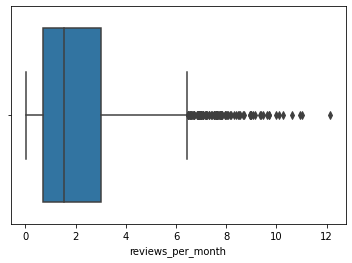

In [284]:
sns.boxplot(x=dataset['reviews_per_month']) 

In [285]:
dataset['reviews_per_month'] = dataset['reviews_per_month'].fillna(0)

In [286]:
dataset.head(3)

,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,...,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Other,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_University District,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,property_type_House,property_type_Other,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,3,2,0,0,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",1,1,4,1.0,1.0,1.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4.454347,2,1,0.466667,0.683333,0.788889,0.947945,207,2011-11-01,2016-01-02,0.95,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",4,2,0,1,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",1,1,4,1.0,1.0,1.0,1,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",5.017280,1,2,0.433333,0.216667,0.177778,0.797260,43,2013-08-19,2015-12-29,0.96,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,3,2,0,0,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",1,1,11,4.5,5.0,7.0,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6.883462,10,4,0.033333,0.100000,0.188889,0.602740,20,2014-07-30,2015-09-03,0.97,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1


last_review column

In [287]:
#import datetime as dt
#dataset['years_since_last_review'] = 2021-pd.to_datetime(dataset['last_review']).dt.year

#dataset.head(3)

In [288]:
dataset.drop(['first_review','last_review'], axis = 1,inplace=True)

amenities column

In [289]:
dataset['amenities'] = dataset['amenities'].apply(lambda x: x.replace('{','')
                                                              .replace('}','')
                                                              .replace('"','')
                                                              .replace(' ','_')
                                                              .replace(',',' ')
                                                              .split()
                                                             )

In [290]:
# find unique ameneties
amenities_list = []
for val in dataset['amenities']:
    for item in val:
        item_to_append = 'has_'+item
        if item_to_append not in amenities_list:
            amenities_list.append(item_to_append)          

In [291]:
print(amenities_list)

['has_TV', 'has_Cable_TV', 'has_Internet', 'has_Wireless_Internet', 'has_Air_Conditioning', 'has_Kitchen', 'has_Heating', 'has_Family/Kid_Friendly', 'has_Washer', 'has_Dryer', 'has_Free_Parking_on_Premises', 'has_Buzzer/Wireless_Intercom', 'has_Smoke_Detector', 'has_Carbon_Monoxide_Detector', 'has_First_Aid_Kit', 'has_Safety_Card', 'has_Fire_Extinguisher', 'has_Essentials', 'has_Pets_Allowed', 'has_Pets_live_on_this_property', 'has_Dog(s)', 'has_Cat(s)', 'has_Hot_Tub', 'has_Indoor_Fireplace', 'has_Shampoo', 'has_Breakfast', 'has_24-Hour_Check-in', 'has_Hangers', 'has_Hair_Dryer', 'has_Iron', 'has_Laptop_Friendly_Workspace', 'has_Suitable_for_Events', 'has_Elevator_in_Building', 'has_Lock_on_Bedroom_Door', 'has_Wheelchair_Accessible', 'has_Gym', 'has_Pool', 'has_Smoking_Allowed', 'has_Other_pet(s)', 'has_Doorman', 'has_Washer_/_Dryer']


In [292]:
# add new columns for each item in amenities list
dataset = dataset.assign(**dict.fromkeys(amenities_list, np.nan))

In [293]:
# Fill in cell value with 1 if the property has a particular amenity, else 0
for index, row in dataset.iterrows():
    for amenity in amenities_list:
        if amenity[4:] in row['amenities']:
            dataset.loc[index, amenity] = 1
        else:
            dataset.loc[index, amenity] = 0

In [294]:
for amenity in amenities_list:
  print(amenity[4:])

TV
Cable_TV
Internet
Wireless_Internet
Air_Conditioning
Kitchen
Heating
Family/Kid_Friendly
Washer
Dryer
Free_Parking_on_Premises
Buzzer/Wireless_Intercom
Smoke_Detector
Carbon_Monoxide_Detector
First_Aid_Kit
Safety_Card
Fire_Extinguisher
Essentials
Pets_Allowed
Pets_live_on_this_property
Dog(s)
Cat(s)
Hot_Tub
Indoor_Fireplace
Shampoo
Breakfast
24-Hour_Check-in
Hangers
Hair_Dryer
Iron
Laptop_Friendly_Workspace
Suitable_for_Events
Elevator_in_Building
Lock_on_Bedroom_Door
Wheelchair_Accessible
Gym
Pool
Smoking_Allowed
Other_pet(s)
Doorman
Washer_/_Dryer


In [295]:
dataset.head(2)

,summary,space,description,neighborhood_overview,notes,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,...,has_Cable_TV,has_Internet,has_Wireless_Internet,has_Air_Conditioning,has_Kitchen,has_Heating,has_Family/Kid_Friendly,has_Washer,has_Dryer,has_Free_Parking_on_Premises,has_Buzzer/Wireless_Intercom,has_Smoke_Detector,has_Carbon_Monoxide_Detector,has_First_Aid_Kit,has_Safety_Card,has_Fire_Extinguisher,has_Essentials,has_Pets_Allowed,has_Pets_live_on_this_property,has_Dog(s),has_Cat(s),has_Hot_Tub,has_Indoor_Fireplace,has_Shampoo,has_Breakfast,has_24-Hour_Check-in,has_Hangers,has_Hair_Dryer,has_Iron,has_Laptop_Friendly_Workspace,has_Suitable_for_Events,has_Elevator_in_Building,has_Lock_on_Bedroom_Door,has_Wheelchair_Accessible,has_Gym,has_Pool,has_Smoking_Allowed,has_Other_pet(s),has_Doorman,has_Washer_/_Dryer
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,3,2,0,0,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",1,1,4,1.0,1.0,1.0,1,"[TV, Cable_TV, Internet, Wireless_Internet, Ai...",4.454347,2,1,0.466667,0.683333,0.788889,0.947945,207,0.95,0,0,0,0,1,0,0,0,0,2,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",4,2,0,1,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",1,1,4,1.0,1.0,1.0,1,"[TV, Internet, Wireless_Internet, Kitchen, Fre...",5.017280,1,2,0.433333,0.216667,0.177778,0.797260,43,0.96,0,0,0,0,0,0,0,1,1,6,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [296]:
dataset.shape

(3816, 194)

host_verifications column

In [297]:
dataset['host_verifications'] = dataset['host_verifications'].apply(lambda x: x.replace('[','')
                                                              .replace(']','')
                                                              .replace("'",'')
                                                              .replace(',','')
                                                              .split()
                                                             )

In [298]:
verification_list = []
for val in dataset['host_verifications']:
    for item in val:
        item_to_append = 'verified_'+item
        if item_to_append not in verification_list:
            verification_list.append(item_to_append)
            
print(verification_list)

['verified_email', 'verified_phone', 'verified_reviews', 'verified_kba', 'verified_facebook', 'verified_linkedin', 'verified_jumio', 'verified_google', 'verified_manual_offline', 'verified_amex', 'verified_manual_online', 'verified_sent_id', 'verified_photographer', 'verified_weibo']


In [299]:
dataset = dataset.assign(**dict.fromkeys(verification_list, np.nan))

In [300]:
# Fill in cell value with 1 if the host verification was done, else 0

for index, row in dataset.iterrows():
    for _ in verification_list:
        if _[9:] in row['host_verifications']:
            dataset.loc[index, _] = 1
        else:
            dataset.loc[index, _] = 0

In [301]:
dataset.drop(['amenities','host_verifications'], axis = 1,inplace=True)

merging

In [302]:
#dataset.value_counts('id')

In [303]:
#dataset_reviews=pd.read_csv('reviews.csv')

In [304]:
#dataset_reviews.value_counts('id')

In [305]:
#dataset = pd.merge(dataset, dataset_reviews, on='id', how='left')

In [306]:
#dataset.head(2)

In [307]:
#dataset_reviews.shape

In [308]:
#dataset.shape

After we merge the 2 datasets, only 9 rows get reviews whereas all the other rows have no reviews so there is really no point in doing this merge.

In [309]:
dataset.drop(['summary','space','notes','transit','neighborhood_overview'], axis = 1,inplace=True)

In [310]:
dataset.head(1)

,description,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,has_thumbnail_url,has_medium_url,has_xl_picture_url,host_since_years,host_from_seattle,host_has_about,...,has_Safety_Card,has_Fire_Extinguisher,has_Essentials,has_Pets_Allowed,has_Pets_live_on_this_property,has_Dog(s),has_Cat(s),has_Hot_Tub,has_Indoor_Fireplace,has_Shampoo,has_Breakfast,has_24-Hour_Check-in,has_Hangers,has_Hair_Dryer,has_Iron,has_Laptop_Friendly_Workspace,has_Suitable_for_Events,has_Elevator_in_Building,has_Lock_on_Bedroom_Door,has_Wheelchair_Accessible,has_Gym,has_Pool,has_Smoking_Allowed,has_Other_pet(s),has_Doorman,has_Washer_/_Dryer,verified_email,verified_phone,verified_reviews,verified_kba,verified_facebook,verified_linkedin,verified_jumio,verified_google,verified_manual_offline,verified_amex,verified_manual_online,verified_sent_id,verified_photographer,verified_weibo
0,Make your self at home in this charming one-be...,3,2,0,0,3.0,3.0,1,1,4,1.0,1.0,1.0,1,4.454347,2,1,0.466667,0.683333,0.788889,0.947945,207,0.95,0,0,0,0,1,0,0,0,0,2,4.07,0,0,0,10,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [311]:
dataset.isnull().values.any()

False

description column

In [312]:
dataset['description']=dataset['description'].astype(str)  

In [313]:
dataset['description'].isnull().sum()

0

In [314]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [315]:
dataset['description'] = dataset['description'].apply(remove_punctuation)

In [316]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')
def stopwords(text):
    text=re.sub('[^a-zA-Z]',' ')
    text=text.lower()
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [317]:
dataset.head(5)

,description,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,has_thumbnail_url,has_medium_url,has_xl_picture_url,host_since_years,host_from_seattle,host_has_about,...,has_Safety_Card,has_Fire_Extinguisher,has_Essentials,has_Pets_Allowed,has_Pets_live_on_this_property,has_Dog(s),has_Cat(s),has_Hot_Tub,has_Indoor_Fireplace,has_Shampoo,has_Breakfast,has_24-Hour_Check-in,has_Hangers,has_Hair_Dryer,has_Iron,has_Laptop_Friendly_Workspace,has_Suitable_for_Events,has_Elevator_in_Building,has_Lock_on_Bedroom_Door,has_Wheelchair_Accessible,has_Gym,has_Pool,has_Smoking_Allowed,has_Other_pet(s),has_Doorman,has_Washer_/_Dryer,verified_email,verified_phone,verified_reviews,verified_kba,verified_facebook,verified_linkedin,verified_jumio,verified_google,verified_manual_offline,verified_amex,verified_manual_online,verified_sent_id,verified_photographer,verified_weibo
0,Make your self at home in this charming onebed...,3,2,0,0,3.0,3.0,1,1,4,1.0,1.0,1.0,1,4.454347,2,1,0.466667,0.683333,0.788889,0.947945,207,0.950000,0,0,0,0,1,0,0,0,0,2,4.07,0,0,0,10,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Chemically sensitive Weve removed the irritant...,4,2,0,1,6.0,6.0,1,1,4,1.0,1.0,1.0,1,5.017280,1,2,0.433333,0.216667,0.177778,0.797260,43,0.960000,0,0,0,0,0,0,0,1,1,6,1.48,1,1,1,8,1,1,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,New modern house built in 2013 Spectacular su...,3,2,0,0,2.0,2.0,1,1,11,4.5,5.0,7.0,1,6.883462,10,4,0.033333,0.100000,0.188889,0.602740,20,0.970000,0,0,0,0,0,0,0,0,0,2,1.15,0,0,0,7,1,1,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A charming apartment that sits atop Queen Anne...,0,0,1,0,1.0,1.0,1,1,3,1.0,0.0,2.0,1,4.615120,1,1,0.000000,0.000000,0.000000,0.391781,0,0.945393,1,1,1,1,1,1,0,0,0,1,0.00,0,0,0,8,1,0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Cozy family craftman house in beautiful neighb...,4,3,1,0,2.0,2.0,1,1,6,2.0,3.0,3.0,1,6.111467,6,1,1.000000,1.000000,1.000000,1.000000,38,0.920000,1,1,0,0,1,1,0,0,0,1,0.89,0,0,0,10,1,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


stemming

In [318]:
from nltk.stem.snowball import SnowballStemmer
# create an object of stemming function    
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''   
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [319]:
dataset['description'] = dataset['description'].apply(stemming)
dataset.head(3)

,description,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,has_thumbnail_url,has_medium_url,has_xl_picture_url,host_since_years,host_from_seattle,host_has_about,...,has_Safety_Card,has_Fire_Extinguisher,has_Essentials,has_Pets_Allowed,has_Pets_live_on_this_property,has_Dog(s),has_Cat(s),has_Hot_Tub,has_Indoor_Fireplace,has_Shampoo,has_Breakfast,has_24-Hour_Check-in,has_Hangers,has_Hair_Dryer,has_Iron,has_Laptop_Friendly_Workspace,has_Suitable_for_Events,has_Elevator_in_Building,has_Lock_on_Bedroom_Door,has_Wheelchair_Accessible,has_Gym,has_Pool,has_Smoking_Allowed,has_Other_pet(s),has_Doorman,has_Washer_/_Dryer,verified_email,verified_phone,verified_reviews,verified_kba,verified_facebook,verified_linkedin,verified_jumio,verified_google,verified_manual_offline,verified_amex,verified_manual_online,verified_sent_id,verified_photographer,verified_weibo
0,make your self at home in this charm onebedroo...,3,2,0,0,3.0,3.0,1,1,4,1.0,1.0,1.0,1,4.454347,2,1,0.466667,0.683333,0.788889,0.947945,207,0.95,0,0,0,0,1,0,0,0,0,2,4.07,0,0,0,10,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chemic sensit weve remov the irrit trigger all...,4,2,0,1,6.0,6.0,1,1,4,1.0,1.0,1.0,1,5.017280,1,2,0.433333,0.216667,0.177778,0.797260,43,0.96,0,0,0,0,0,0,0,1,1,6,1.48,1,1,1,8,1,1,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,new modern hous built in 2013 spectacular suns...,3,2,0,0,2.0,2.0,1,1,11,4.5,5.0,7.0,1,6.883462,10,4,0.033333,0.100000,0.188889,0.602740,20,0.97,0,0,0,0,0,0,0,0,0,2,1.15,0,0,0,7,1,1,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [320]:
dataset.isnull().values.any()

False

In [321]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X_description=cv.fit_transform(dataset['description']).toarray()

In [322]:
print(X_description)   

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]]


In [323]:
X_description.shape

(3816, 1500)

In [324]:
dataset.drop(['description'], axis = 1,inplace=True)

In [325]:
dataset.shape 

(3816, 200)

splitting

In [326]:
dataset.columns.get_loc('price')

13

In [327]:
dataset.shape 

(3816, 200)

In [328]:
X = dataset.drop(['price'],axis=1)
#index=13
#X_1=np.delete(X,index)
#X_1 = np.delete(X, 13, 1)
#X_1.shape
#a = np.delete(a, index,axis)
X.shape

(3816, 199)

In [329]:
y=dataset['price']

In [330]:
y.shape

(3816,)

In [331]:
X_1=np.concatenate((X, X_description), axis=1)

In [332]:
X_1.shape

(3816, 1699)

In [333]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_1,y,test_size=0.20,random_state=0)

In [334]:
dataset.isnull().values.any()

False

In [335]:
print(X_1)

[[3 2 0 ... 0 0 0]
 [4 2 0 ... 0 0 0]
 [3 2 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [4 3 1 ... 0 0 0]
 [2 3 1 ... 0 0 0]]


Linear Regression

In [336]:
from sklearn.linear_model import LinearRegression

regressor1 = LinearRegression()
regressor1.fit(X_train,y_train)
y_pred1=(regressor1.predict(X_test))

In [337]:
print(y_pred1)

[4.39117613 3.95148023 4.96103416 4.32918904 4.97158038 4.57711896
 4.46984948 4.45325172 3.82542197 4.71432436 4.73593149 4.33035701
 3.2626832  4.53151505 4.17099453 3.83389393 5.37602195 4.1162833
 4.86759369 3.83161414 4.21229246 4.39638919 5.02388603 4.61788478
 4.51966219 5.61412002 4.13434925 5.46757519 4.90269434 5.13737815
 5.6034428  4.63134543 5.0259117  4.01349489 4.76763697 4.54330773
 5.29941966 4.74382395 4.36590171 5.2187325  4.58280633 5.11396336
 4.70760937 5.83448402 4.6862414  4.0561437  5.26041753 3.70036966
 4.66898067 4.48986517 4.44279264 4.95509066 5.30796339 4.79712403
 3.66314545 5.06900754 5.74354326 5.49647094 3.89096173 4.56190771
 4.80145491 4.00262424 4.09544815 4.69025069 5.0008793  4.44354049
 4.21572678 5.61623983 4.05124784 4.5489871  4.62514843 4.82207962
 3.97154871 4.57765538 3.51316838 4.83647815 4.47041423 3.32264943
 4.55839349 5.51882766 4.54403702 5.51528838 3.87382382 5.81207036
 5.21253124 3.8904749  4.75394197 5.27306316 4.25474627 6.33676

In [338]:
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.values.reshape(len(y_test),1)),1))

[[4.39117613 4.3307333 ]
 [3.95148023 4.07753754]
 [4.96103416 4.83628178]
 ...
 [4.20997471 4.91265488]
 [5.34588955 5.69035959]
 [4.69732262 5.484797  ]]


In [339]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred1)

0.3060922752306451

In [340]:
### Calculate RMSE
from sklearn import preprocessing, metrics
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred1))
rmse1

0.4516421436013045

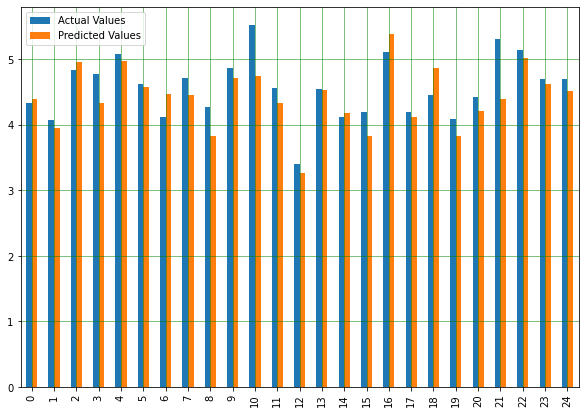

In [341]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred1.flatten()})
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [342]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred1)

0.20398062587678134

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Residuals for the model')

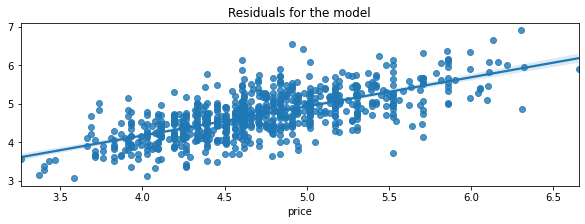

In [343]:
fig = plt.figure(figsize=(10,3))
sns.regplot(y_test,y_pred1)
plt.title("Residuals for the model")

Ridge Regression

In [344]:
from sklearn.linear_model import Ridge

regressor2 = Ridge()
regressor2.fit(X_train, y_train)

y_pred2=regressor2.predict(X_test)

In [345]:
print(y_pred2)

[4.42351911 4.02629257 5.00673639 4.3702118  4.95824285 4.50752407
 4.40327532 4.58368194 3.88517874 4.74033557 4.76950683 4.39251705
 3.29402738 4.45515853 4.22087141 3.83745142 5.36978386 4.15258306
 4.93771704 3.85700638 4.21887236 4.4272384  5.18392934 4.51769856
 4.68101192 5.4761272  4.33520314 5.58760014 4.88178571 5.10667989
 5.62626116 4.60112802 4.88428289 4.00503967 4.84249162 4.51006182
 5.28625516 4.69796696 4.27978727 5.19775553 4.60465274 5.04372741
 4.71745012 5.63547124 4.66868665 4.14028479 5.18938567 3.74214821
 4.63503772 4.52696192 4.37826435 4.87443375 5.26505248 4.71099166
 3.60077649 5.03991822 5.77884304 5.45725222 3.87497276 4.56340544
 4.79233962 4.11227174 4.17764519 4.59796711 5.04091509 4.52648176
 4.223685   5.63479806 3.99406389 4.55996684 4.59172116 4.79488926
 4.12853073 4.69593206 3.47922962 4.85092532 4.44209931 3.36121801
 4.53006525 5.36312249 4.57606775 5.65908104 3.89726291 5.91314596
 5.20025846 4.01557316 4.7805727  5.27357455 4.35002082 6.3795

In [346]:
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.values.reshape(len(y_test),1)),1))

[[4.42351911 4.3307333 ]
 [4.02629257 4.07753754]
 [5.00673639 4.83628178]
 ...
 [4.49922928 4.91265488]
 [5.41931752 5.69035959]
 [4.83682297 5.484797  ]]


In [347]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred2)

0.4104927330005582

In [348]:
### Calculate RMSE
from sklearn import preprocessing, metrics
rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred2))
rmse2

0.4162825252957918

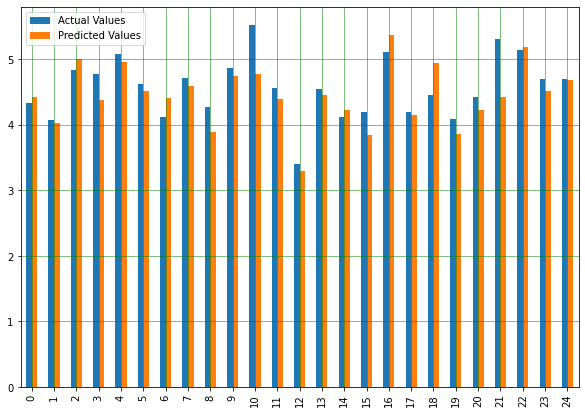

In [349]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred2.flatten()})
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [350]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred2)

0.17329114086664152

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Residuals for the model')

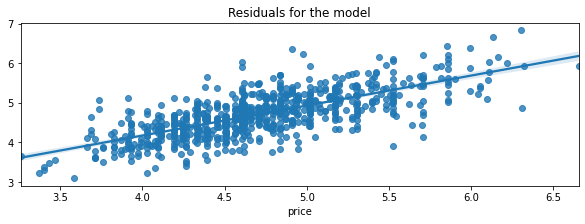

In [351]:
fig = plt.figure(figsize=(10,3))
sns.regplot(y_test,y_pred2)
plt.title("Residuals for the model")

Lasso Regression

In [352]:
from sklearn.linear_model import Lasso

regressor3 = Lasso(alpha=10,max_iter = 10000)
regressor3.fit(X_train, y_train)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [353]:
y_pred3=regressor3.predict(X_test)

In [354]:
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test.values.reshape(len(y_test),1)),1))

[[4.68275831 4.3307333 ]
 [4.68275831 4.07753754]
 [4.68275831 4.83628178]
 ...
 [4.68275831 4.91265488]
 [4.68275831 5.69035959]
 [4.68275831 5.484797  ]]


In [355]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred3)

-0.0035301940526526465

Decision Tree

In [356]:
from sklearn.tree import DecisionTreeRegressor
regressor4=DecisionTreeRegressor(min_samples_leaf=.0001)
regressor4.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.0001, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [357]:
y_pred4=regressor4.predict(X_test)

In [358]:
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test.values.reshape(len(y_test),1)),1))

[[3.71357203 4.3307333 ]
 [4.07753754 4.07753754]
 [4.98360682 4.83628178]
 ...
 [4.49980974 4.91265488]
 [5.78689718 5.69035959]
 [5.82600021 5.484797  ]]


In [359]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred4)

0.4175138516597908

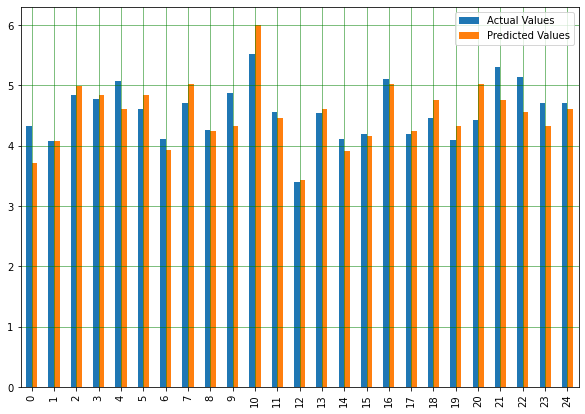

In [360]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred4.flatten()})
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [361]:
### Calculate RMSE
from sklearn import preprocessing, metrics
rmse4 = np.sqrt(metrics.mean_squared_error(y_test, y_pred4))
rmse4

0.4137961065214853

In [362]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred4)

0.1712272177723404

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Residuals for the model')

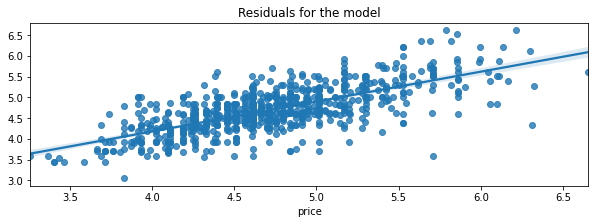

In [363]:
fig = plt.figure(figsize=(10,3))
sns.regplot(y_test,y_pred4)
plt.title("Residuals for the model")

Random Forest Regression

In [364]:
from sklearn.ensemble import RandomForestRegressor

regressor5 = RandomForestRegressor()
regressor5.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [365]:
y_pred5=regressor5.predict(X_test)

In [366]:
print(np.concatenate((y_pred5.reshape(len(y_pred5),1), y_test.values.reshape(len(y_test),1)),1))

[[4.2137236  4.3307333 ]
 [4.13633694 4.07753754]
 [4.77967721 4.83628178]
 ...
 [4.8147704  4.91265488]
 [5.38847196 5.69035959]
 [5.15693296 5.484797  ]]


In [367]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred5)

0.6813472299826384

In [368]:
regressor5.score(X_train,y_train)

0.9598488943192964

In [369]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred5))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

Mean Absolute Error: 0.22857273378921428
Mean Squared Error: 0.09367094376578129
Root Mean Squared Error: 0.3060570923304691


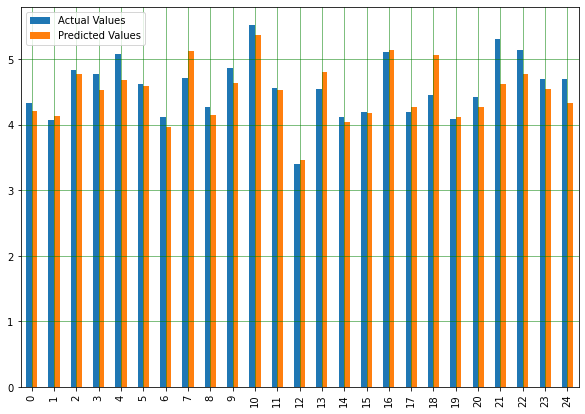

In [370]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred5.flatten()})
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Residuals for the model')

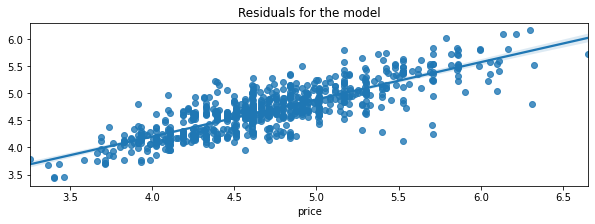

In [371]:
fig = plt.figure(figsize=(10,3))
sns.regplot(y_test,y_pred5)
plt.title("Residuals for the model")

Random forest tuned

In [372]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=3, verbose=0, warm_start=False)

In [373]:
y_pred=forest.predict(X_test)

In [374]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[4.20581809 4.3307333 ]
 [4.15812987 4.07753754]
 [4.83228523 4.83628178]
 ...
 [4.82360108 4.91265488]
 [5.45765502 5.69035959]
 [5.20421192 5.484797  ]]


In [375]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6823888263698719

In [376]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.22912718230579535
Mean Squared Error: 0.0933647568256525
Root Mean Squared Error: 0.3055564707638385


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Residuals for the model')

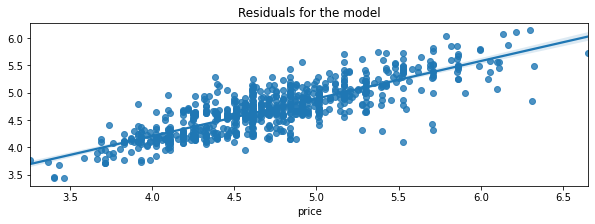

In [377]:
fig = plt.figure(figsize=(10,3))
sns.regplot(y_test,y_pred)
plt.title("Residuals for the model")

SVR

In [378]:
from sklearn.svm import SVR
regressor6=SVR(kernel='rbf')
regressor6.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [379]:
y_pred6=regressor6.predict(X_test)

In [380]:
print(np.concatenate((y_pred6.reshape(len(y_pred6),1), y_test.values.reshape(len(y_test),1)),1))

[[4.24947263 4.3307333 ]
 [4.18284391 4.07753754]
 [4.5279504  4.83628178]
 ...
 [4.81707482 4.91265488]
 [5.28321486 5.69035959]
 [5.21193625 5.484797  ]]


In [381]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred6)

0.6446144804096696

In [382]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred6))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred6))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))

Mean Absolute Error: 0.24052621747523606
Mean Squared Error: 0.104468876949995
Root Mean Squared Error: 0.32321645525869347


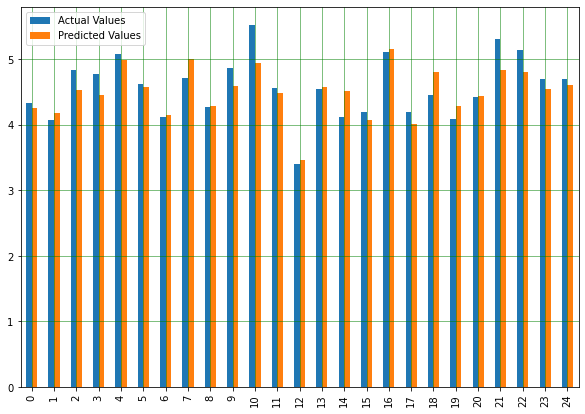

In [383]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred6.flatten()})
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Residuals for the model')

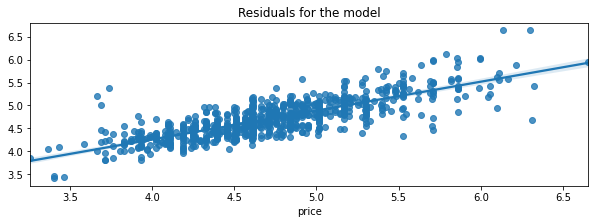

In [384]:
fig = plt.figure(figsize=(10,3))
sns.regplot(y_test,y_pred6)
plt.title("Residuals for the model")

Catboost

In [385]:
!pip install catboost

In [386]:
from numpy import mean
from numpy import std
from catboost import CatBoostRegressor
best_grid = CatBoostRegressor()
best_grid.fit(X_train, y_train)
round(best_grid.score(X_train, y_train), 2)

Learning rate set to 0.047605
0:	learn: 0.5486200	total: 75.7ms	remaining: 1m 15s
1:	learn: 0.5355696	total: 98.4ms	remaining: 49.1s
2:	learn: 0.5240610	total: 121ms	remaining: 40.3s
3:	learn: 0.5124598	total: 144ms	remaining: 35.9s
4:	learn: 0.5026538	total: 166ms	remaining: 33.1s
5:	learn: 0.4916911	total: 191ms	remaining: 31.6s
6:	learn: 0.4837142	total: 215ms	remaining: 30.5s
7:	learn: 0.4753643	total: 238ms	remaining: 29.5s
8:	learn: 0.4675922	total: 262ms	remaining: 28.9s
9:	learn: 0.4608256	total: 285ms	remaining: 28.2s
10:	learn: 0.4535579	total: 312ms	remaining: 28.1s
11:	learn: 0.4457746	total: 337ms	remaining: 27.7s
12:	learn: 0.4397292	total: 360ms	remaining: 27.4s
13:	learn: 0.4327878	total: 384ms	remaining: 27.1s
14:	learn: 0.4270351	total: 410ms	remaining: 26.9s
15:	learn: 0.4212114	total: 434ms	remaining: 26.7s
16:	learn: 0.4148450	total: 457ms	remaining: 26.4s
17:	learn: 0.4104323	total: 482ms	remaining: 26.3s
18:	learn: 0.4061544	total: 518ms	remaining: 26.7s
19:	lear

0.93

In [387]:
y_pred7=best_grid.predict(X_test)

In [388]:
print(np.concatenate((y_pred7.reshape(len(y_pred7),1), y_test.values.reshape(len(y_test),1)),1))

[[4.23223681 4.3307333 ]
 [4.04351619 4.07753754]
 [4.77533528 4.83628178]
 ...
 [4.86313167 4.91265488]
 [5.55989804 5.69035959]
 [5.24630866 5.484797  ]]


In [389]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred7)

0.7212165787495914

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Residuals for the model')

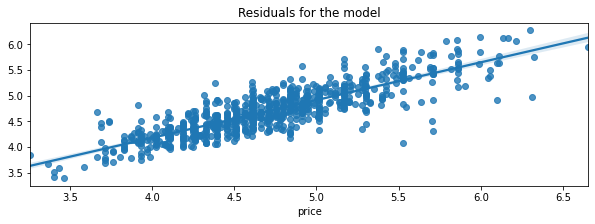

In [390]:
fig = plt.figure(figsize=(10,3))
sns.regplot(y_test,y_pred7)
plt.title("Residuals for the model")

In [391]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred7))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred7))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred7)))

Mean Absolute Error: 0.21230355968457007
Mean Squared Error: 0.0819509780924118
Root Mean Squared Error: 0.28627081250524267


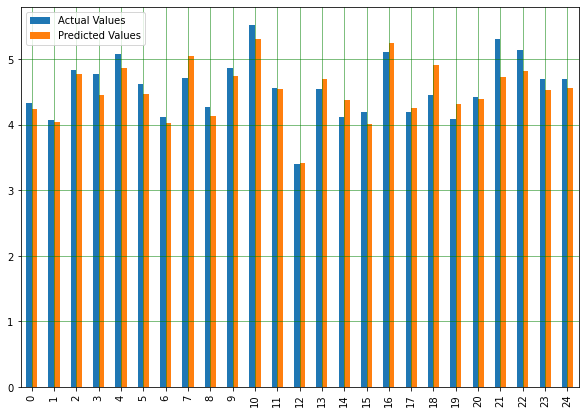

In [392]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred7.flatten()})
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

LGBM Regressor

In [393]:
from lightgbm import LGBMRegressor
regressor8 = LGBMRegressor().fit(X_train, y_train)
y_pred8 = regressor8.predict(X_test)


In [394]:
print(np.concatenate((y_pred8.reshape(len(y_pred8),1), y_test.values.reshape(len(y_test),1)),1))

[[4.29514283 4.3307333 ]
 [4.13534749 4.07753754]
 [4.87410004 4.83628178]
 ...
 [4.96015099 4.91265488]
 [5.68706449 5.69035959]
 [5.17945368 5.484797  ]]


In [395]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred8)

0.720099727097073

In [396]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred8))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred8))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred8)))

Mean Absolute Error: 0.21283034092686023
Mean Squared Error: 0.08227928701730229
Root Mean Squared Error: 0.2868436630244815


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Residuals for the model')

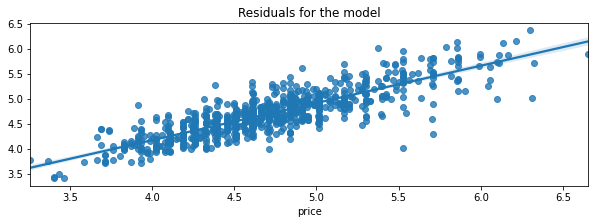

In [397]:
fig = plt.figure(figsize=(10,3))
sns.regplot(y_test,y_pred8)
plt.title("Residuals for the model")

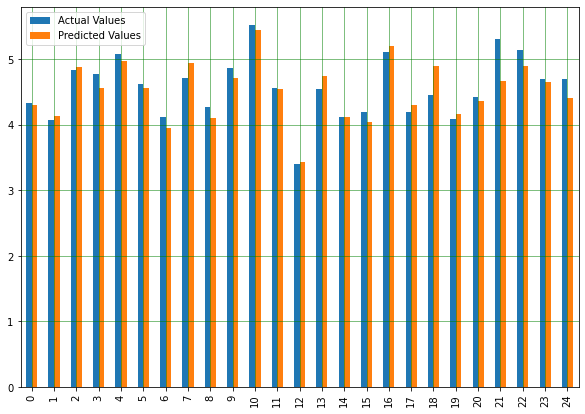

In [398]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred8.flatten()})
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()